# <center> Predicción de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

#1. Introduccion

### GRUPO K:
* Jorge Torrico jorge.torrico.c@ucb.edu.bo
## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

#2. Configuración e Instalación

In [53]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import scipy.stats as stats
import statsmodels.api as stats
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

In [54]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = 'dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

#3. Entendimiento de los Datos

In [55]:
#Tamaño del Dataset
numero_de_registros = raw_data.shape[0]
numero_de_columnas = raw_data.shape[1]
print(f"El DataFrame tiene {numero_de_registros} registros y {numero_de_columnas} atributos")

El DataFrame tiene 1460 registros y 81 atributos


In [56]:
#Cada atributo tiene los siguientes tipos de datos:
tipos_de_datos = raw_data.dtypes
for columna, tipo in tipos_de_datos.items():
    print(f"{columna}: {tipo}")

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int6

* Id: Un identificador único para cada registro.
* MSSubClass: Identifica el tipo de vivienda. Es un valor numérico.
* MSZoning: Identifica la clasificación de zonificación general de la propiedad, como residencial de alta densidad, baja densidad, comercial, etc.
* LotFrontage: La longitud de la línea de frente de la propiedad en pies.
* LotArea: El área total del terreno en pies cuadrados.
* Street: El tipo de acceso a la propiedad (por ejemplo, calle pavimentada o de grava).
* Alley: Tipo de acceso al callejón (si corresponde).
* LotShape: La forma general del lote (por ejemplo, regular, irregular).
* LandContour: La planitud del terreno (por ejemplo, nivel, en pendiente).
* Utilities: Los servicios públicos disponibles en la propiedad (por ejemplo, electricidad, agua).
* LotConfig: Configuración del lote (por ejemplo, esquina, dentro de una comunidad).
* LandSlope: La pendiente del terreno (por ejemplo, suave, moderada, empinada).
* Neighborhood: El vecindario en el que se encuentra la propiedad.
* Condition1 y Condition2: Condiciones de proximidad a diversas características (por ejemplo, carretera principal, ferrocarril).
* BldgType: Tipo de vivienda (por ejemplo, unifamiliar, duplex).
* HouseStyle: Estilo de la casa (por ejemplo, ranchera, colonial).
* OverallQual y OverallCond: Calidad general y estado general de la casa, respectivamente.
* YearBuilt: El año en que se construyó la casa.
* YearRemodAdd: El año en que se realizó la última remodelación importante.
* RoofStyle y RoofMatl: Estilo y material del techo de la casa.
Exterior1st y Exterior2nd: Material exterior de la casa.
* MasVnrType: Tipo de revestimiento de mampostería.
* MasVnrArea: Área de revestimiento de mampostería en pies cuadrados.
* ExterQual y ExterCond: Calidad y estado del material exterior.
* Foundation: Tipo de cimentación de la casa.
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: Información sobre el sótano de la casa, incluyendo calidad, estado, exposición, tipo de finalización y área en pies cuadrados.
* Heating y HeatingQC: Tipo de calefacción y calidad de la misma.
* CentralAir: Si la casa tiene aire acondicionado central o no.
* Electrical: Tipo de sistema eléctrico en la casa.
* 1stFlrSF y 2ndFlrSF: Área del primer y segundo piso en pies cuadrados.
* LowQualFinSF, GrLivArea: Área de superficie habitable en pies cuadrados (incluyendo el primer piso y posiblemente áreas de menor calidad).
* BsmtFullBath y BsmtHalfBath: Número de baños completos y medios en el sótano.
* FullBath y HalfBath: Número de baños completos y medios en el resto de la casa.
* BedroomAbvGr y KitchenAbvGr: Número de habitaciones y cocinas por encima del nivel del sótano.
* KitchenQual: Calidad de la cocina.
* TotRmsAbvGrd: Número total de habitaciones (sin contar baños) por encima del nivel del sótano.
* Functional: Calidad de la funcionalidad de la casa.
* Fireplaces y FireplaceQu: Número de chimeneas y calidad de las mismas.
* GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: Información sobre el garaje, incluyendo tipo, año de construcción, acabado, capacidad, área y calidad.
* PavedDrive: Si el camino de acceso está pavimentado o no.
* WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: Área de diversas áreas de porche y terraza.
* PoolArea y PoolQC: Área de la piscina y calidad de la misma.
* Fence: Tipo de cerca.
* MiscFeature: Características adicionales no cubiertas en otras columnas.
* MiscVal: Valor de características adicionales.
* MoSold y YrSold: Mes y año de venta.
* SaleType y SaleCondition: Tipo de venta y condición de venta.
* SalePrice: El precio de venta de la propiedad.

Donde cada caracteristica singular incide en el "SalePrice", precio de venta de la propiedad.

#4. Manipulación y Limpieza de Datos

In [57]:
#Atributos segun tipo de dato
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#Datos de tipo númerico
datosNumeric = raw_data.select_dtypes(['int64','float64']).columns
datosNumeric

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#Datos de tipo objeto
datosObject = raw_data.select_dtypes(['object']).columns
datosObject

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
#Objetos object a tipo categorico
for column_name in datosObject:
    raw_data[column_name] = raw_data[column_name].astype('category')

In [13]:
# Valores atipicos
raw_data.describe().transpose()

count      mean      std      min       25%       50%  \
Id            1460.00    730.50   421.61     1.00    365.75    730.50   
MSSubClass    1460.00     56.90    42.30    20.00     20.00     50.00   
LotFrontage   1201.00     70.05    24.28    21.00     59.00     69.00   
LotArea       1460.00  10516.83  9981.26  1300.00   7553.50   9478.50   
OverallQual   1460.00      6.10     1.38     1.00      5.00      6.00   
OverallCond   1460.00      5.58     1.11     1.00      5.00      5.00   
YearBuilt     1460.00   1971.27    30.20  1872.00   1954.00   1973.00   
YearRemodAdd  1460.00   1984.87    20.65  1950.00   1967.00   1994.00   
MasVnrArea    1452.00    103.69   181.07     0.00      0.00      0.00   
BsmtFinSF1    1460.00    443.64   456.10     0.00      0.00    383.50   
BsmtFinSF2    1460.00     46.55   161.32     0.00      0.00      0.00   
BsmtUnfSF     1460.00    567.24   441.87     0.00    223.00    477.50   
TotalBsmtSF   1460.00   1057.43   438.71     0.00    795.75    991.50   
1stFlrSF      1460.00   1162.63   386.59   334.00    882.00   1087.00   
2ndFlrSF      1460.00    346.99   436.53     0.00      0.00      0.00   
LowQualFinSF  1460.00      5.84    48.62     0.00      0.00      0.00   
GrLivArea     1460.00   1515.46   525.48   334.00   1129.50   1464.00   
BsmtFullBath  1460.00      0.43     0.52     0.00      0.00      0.00   
BsmtHalfBath  1460.00      0.06     0.24     0.00      0.00      0.00   
FullBath      1460.00      1.57     0.55     0.00      1.00      2.00   
HalfBath      1460.00      0.38     0.50     0.00      0.00      0.00   
BedroomAbvGr  1460.00      2.87     0.82     0.00      2.00      3.00   
KitchenAbvGr  1460.00      1.05     0.22     0.00      1.00      1.00   
TotRmsAbvGrd  1460.00      6.52     1.63     2.00      5.00      6.00   
Fireplaces    1460.00      0.61     0.64     0.00      0.00      1.00   
GarageYrBlt   1379.00   1978.51    24.69  1900.00   1961.00   1980.00   
GarageCars    1460.00      1.77     0.75     0.00      1.00      2.00   
GarageArea    1460.00    472.98   213.80     0.00    334.50    480.00   
WoodDeckSF    1460.00     94.24   125.34     0.00      0.00      0.00   
OpenPorchSF   1460.00     46.66    66.26     0.00      0.00     25.00   
EnclosedPorch 1460.00     21.95    61.12     0.00      0.00      0.00   
3SsnPorch     1460.00      3.41    29.32     0.00      0.00      0.00   
ScreenPorch   1460.00     15.06    55.76     0.00      0.00      0.00   
PoolArea      1460.00      2.76    40.18     0.00      0.00      0.00   
MiscVal       1460.00     43.49   496.12     0.00      0.00      0.00   
MoSold        1460.00      6.32     2.70     1.00      5.00      6.00   
YrSold        1460.00   2007.82     1.33  2006.00   2007.00   2008.00   
SalePrice     1460.00 180921.20 79442.50 34900.00 129975.00 163000.00   

                    75%       max  
Id              1095.25   1460.00  
MSSubClass        70.00    190.00  
LotFrontage       80.00    313.00  
LotArea        11601.50 215245.00  
OverallQual        7.00     10.00  
OverallCond        6.00      9.00  
YearBuilt       2000.00   2010.00  
YearRemodAdd    2004.00   2010.00  
MasVnrArea       166.00   1600.00  
BsmtFinSF1       712.25   5644.00  
BsmtFinSF2         0.00   1474.00  
BsmtUnfSF        808.00   2336.00  
TotalBsmtSF     1298.25   6110.00  
1stFlrSF        1391.25   4692.00  
2ndFlrSF         728.00   2065.00  
LowQualFinSF       0.00    572.00  
GrLivArea       1776.75   5642.00  
BsmtFullBath       1.00      3.00  
BsmtHalfBath       0.00      2.00  
FullBath           2.00      3.00  
HalfBath           1.00      2.00  
BedroomAbvGr       3.00      8.00  
KitchenAbvGr       1.00      3.00  
TotRmsAbvGrd       7.00     14.00  
Fireplaces         1.00      3.00  
GarageYrBlt     2002.00   2010.00  
GarageCars         2.00      4.00  
GarageArea       576.00   1418.00  
WoodDeckSF       168.00    857.00  
OpenPorchSF       68.00    547.00  
EnclosedPorch      0.00    552.00  
3SsnPorch       

In [60]:
#Valores faltantes o nulos
valoresFaltantes = raw_data.isna().sum()
print(valoresFaltantes[valoresFaltantes>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


##4.1 Dropping Data

In [61]:
#Eliminando columnas con alta densidad de valores faltantes y columnas no necesarias
columns_to_drop = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',  ]
raw_data.drop(columns_to_drop, axis=1, inplace= True)

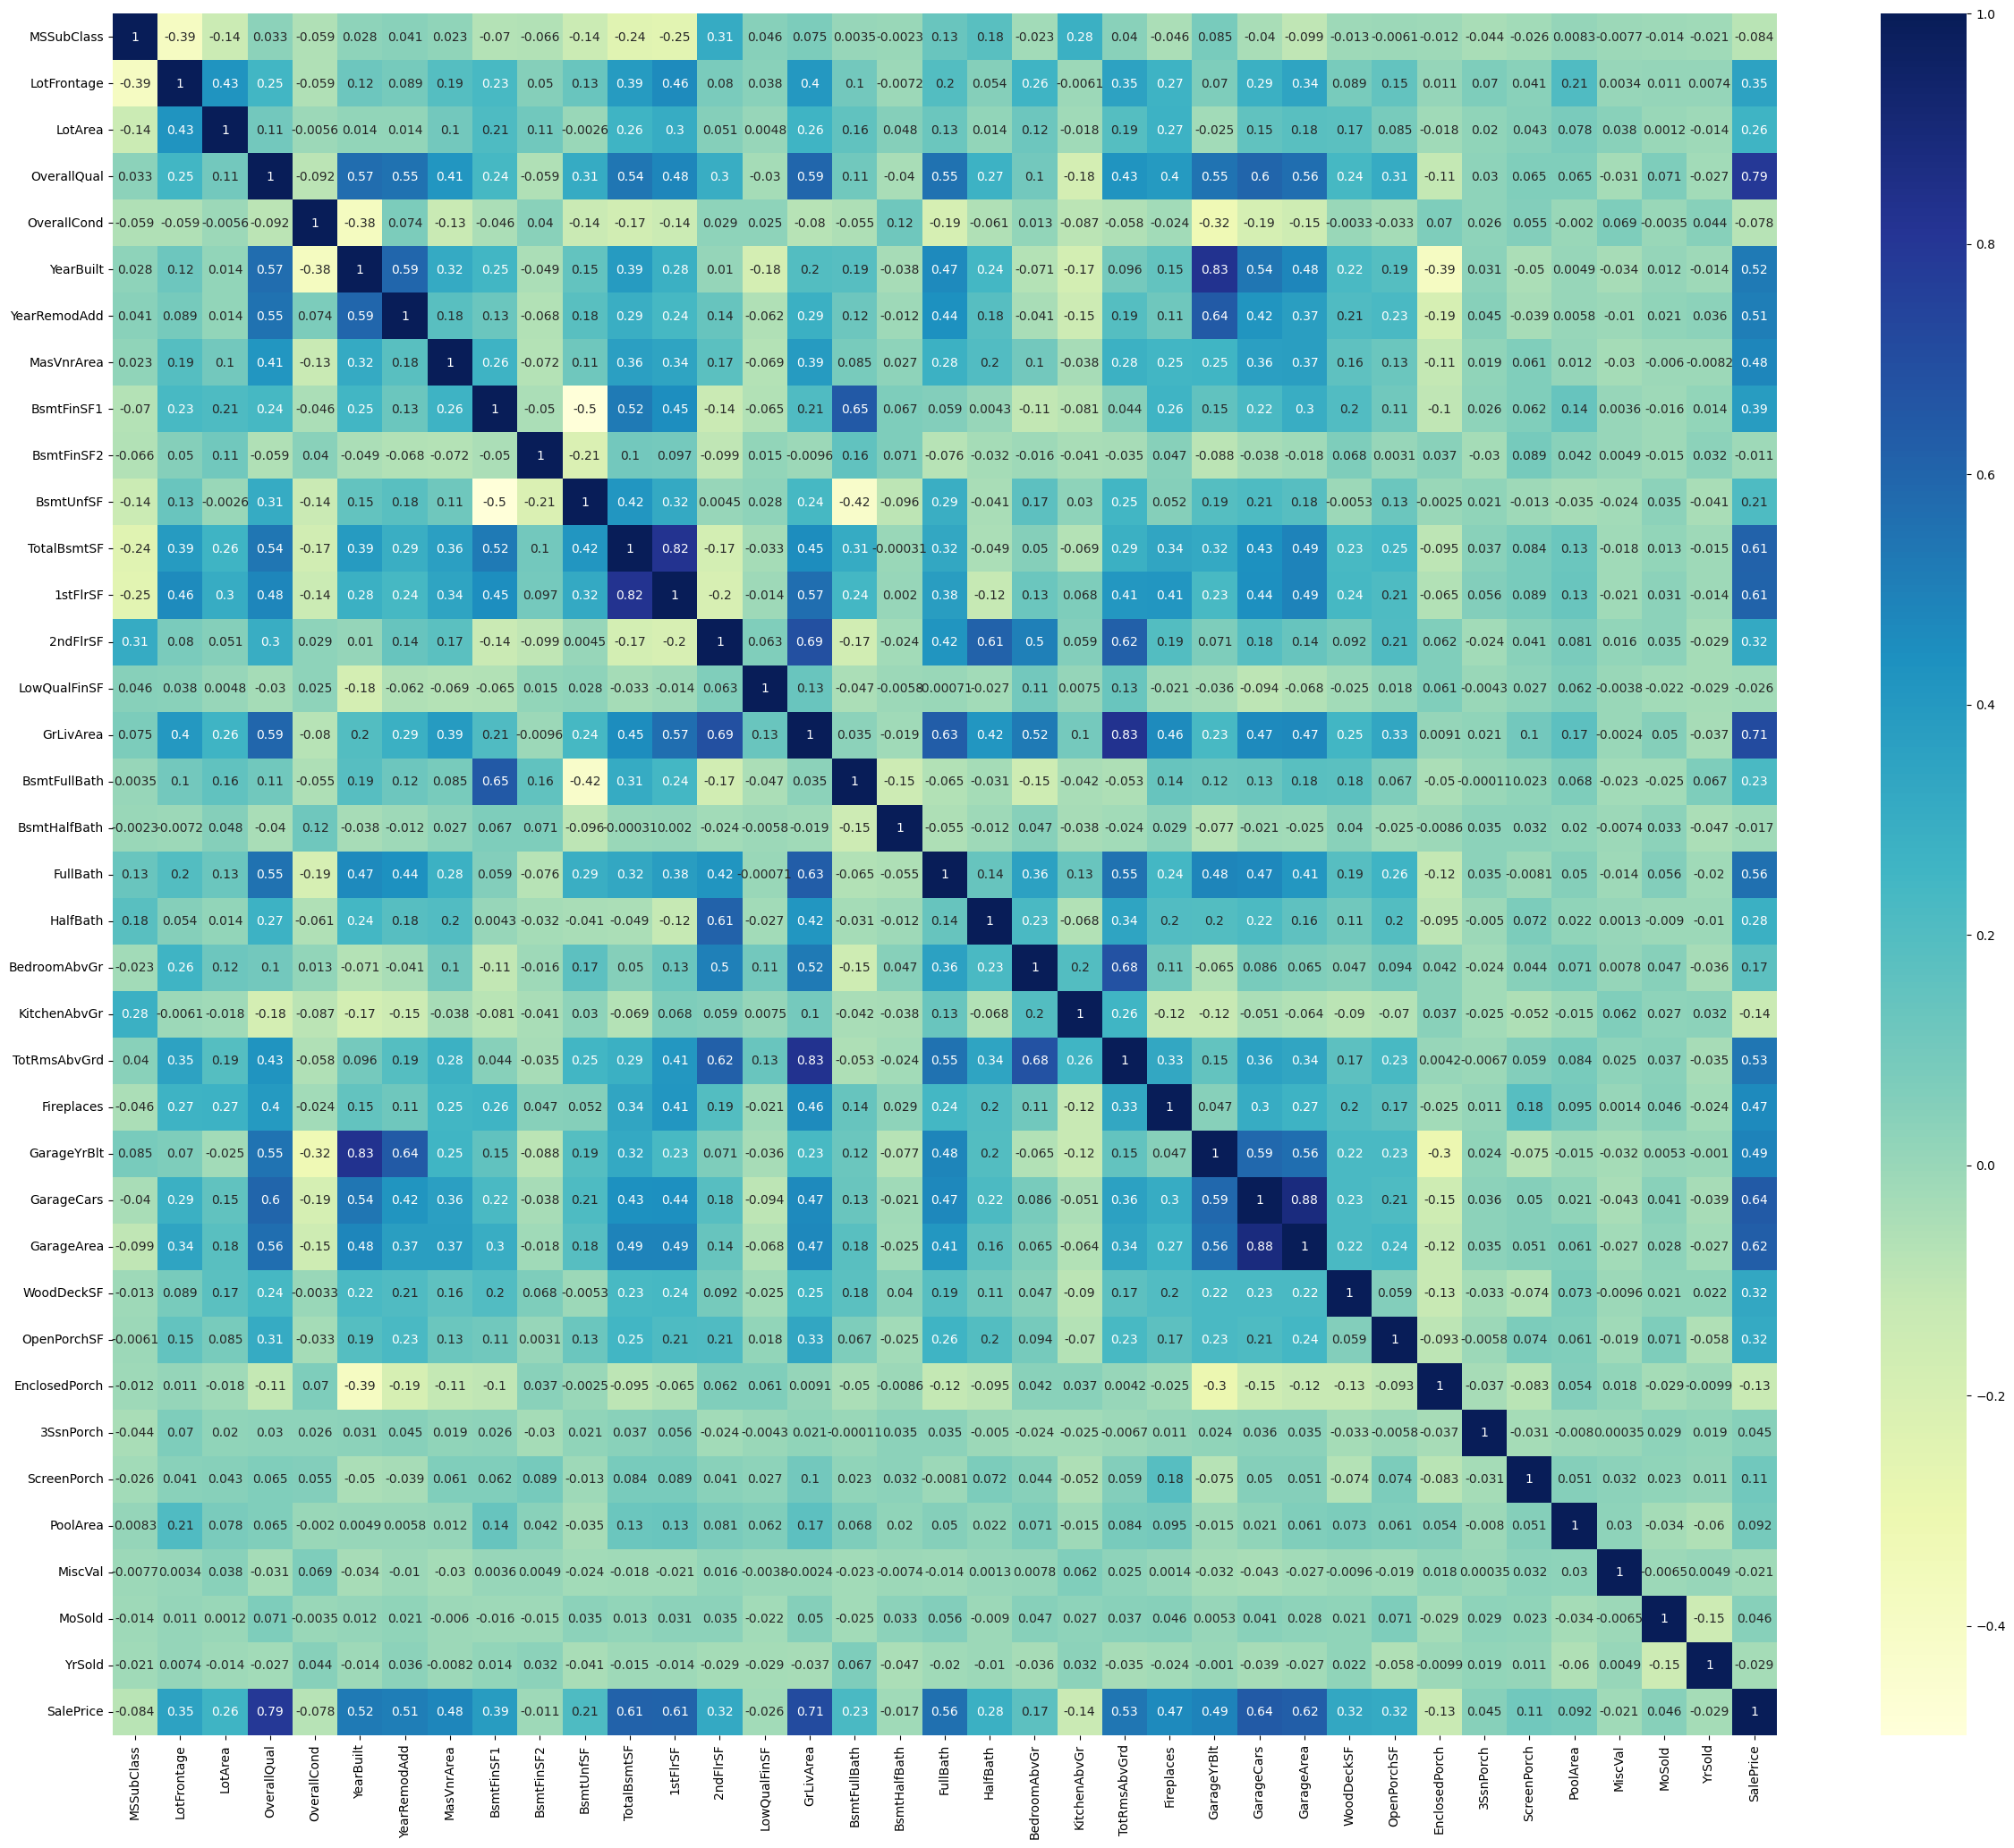

In [62]:
#Correlacion de variables
plt.figure(figsize = (30, 25))
sns.heatmap(raw_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

##4.2 Derived Data


In [63]:
#Completando datos faltantes con el criterio de valor de la media
raw_data.fillna(raw_data.median(), inplace=True)
rawDataNum = raw_data.select_dtypes(include = ['float64', 'int64'])

In [64]:
raw_data['SalePrice'] = np.log1p(raw_data['SalePrice'])

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

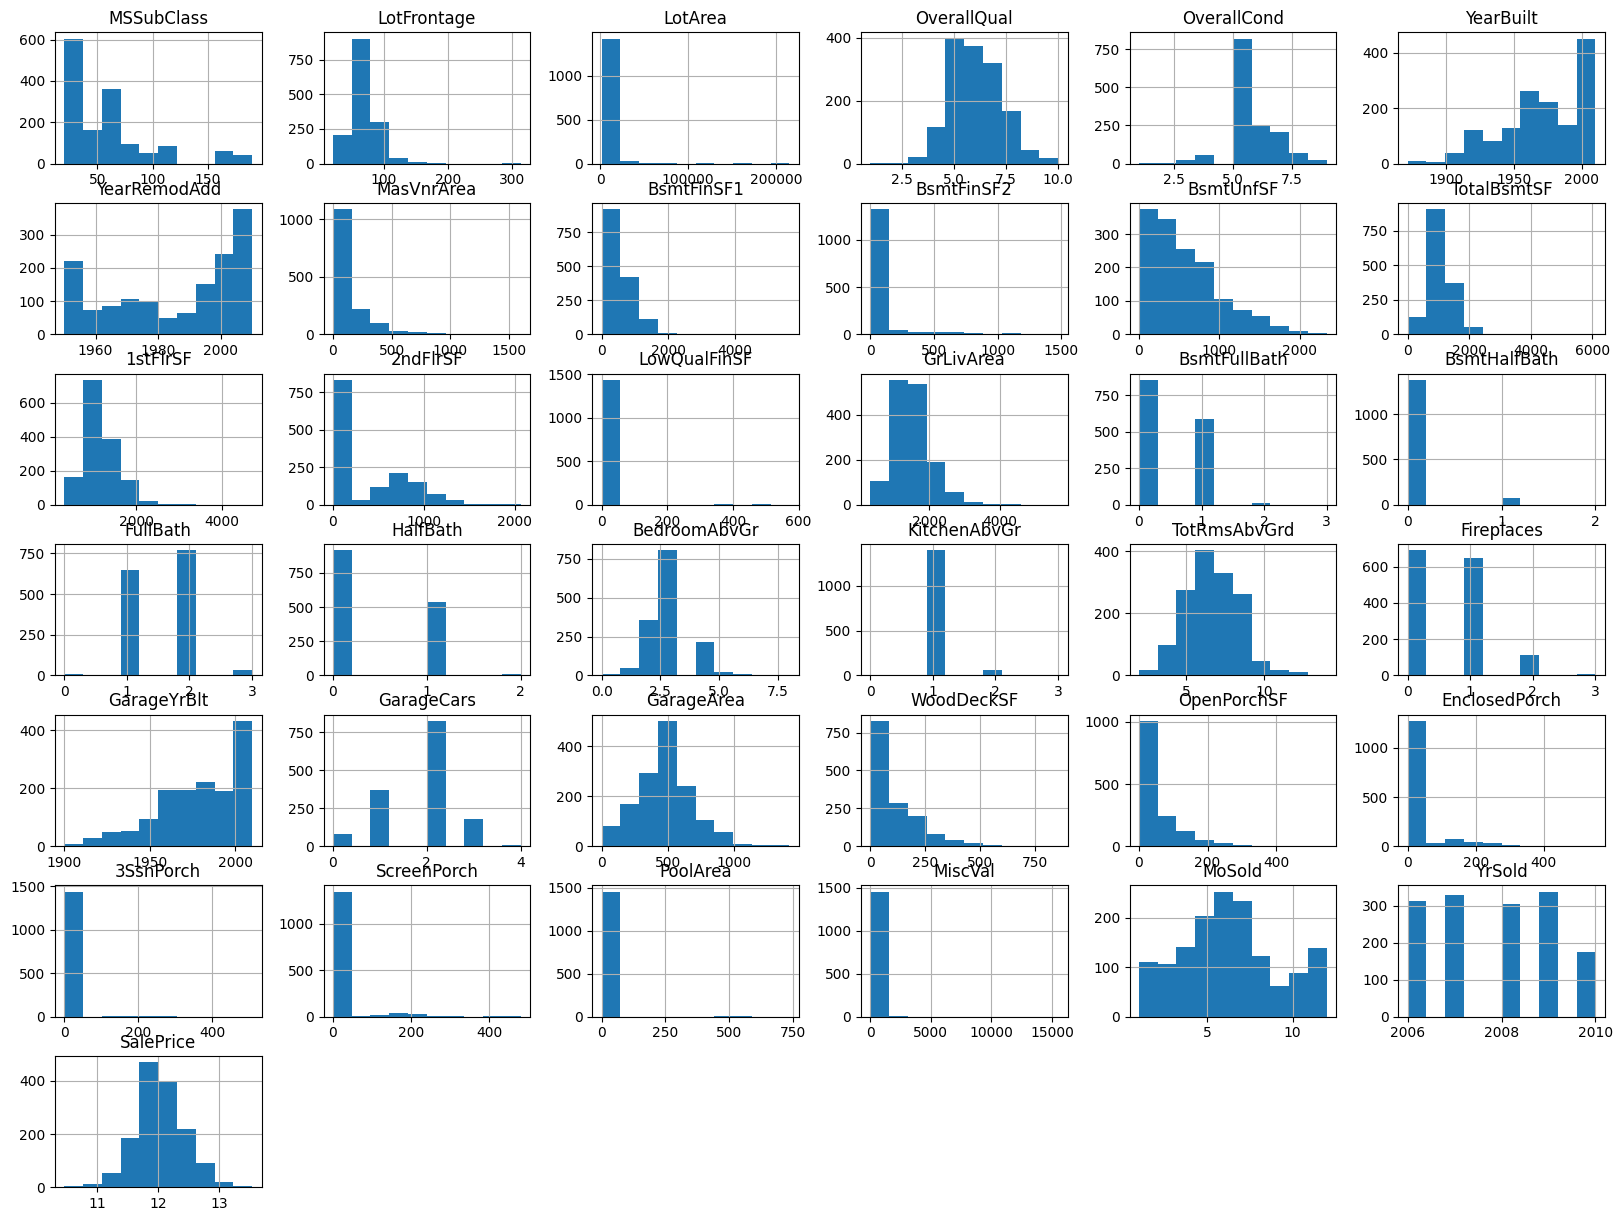

In [65]:
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
raw_data[cols].hist(figsize=(20,15))

#5. Análisis de Datos

##5.1 Análisis-Univariable


In [73]:
# Seleccionamos las columnas númericas
columnaNum = raw_data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

# Se describe las estadísticas básicas de la columnas númericas
print(columnaNum.describe())

       MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
count     1460.00      1460.00   1460.00      1460.00      1460.00    1460.00   
mean        56.90        69.86  10516.83         6.10         5.58    1971.27   
std         42.30        22.03   9981.26         1.38         1.11      30.20   
min         20.00        21.00   1300.00         1.00         1.00    1872.00   
25%         20.00        60.00   7553.50         5.00         5.00    1954.00   
50%         50.00        69.00   9478.50         6.00         5.00    1973.00   
75%         70.00        79.00  11601.50         7.00         6.00    2000.00   
max        190.00       313.00 215245.00        10.00         9.00    2010.00   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
count       1460.00     1460.00     1460.00     1460.00  ...     1460.00   
mean        1984.87      103.12      443.64       46.55  ...       94.24   
std           20.65      180.73      456.1

In [76]:
# Seleccionamos las columnas categoricas
columnaCat = raw_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']]

# Se describe las estadísticas básicas de la columnas númericas
print(columnaCat.describe())

       MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1460       1460       1460  ...       1459        1460   
unique           25          9          8  ...          5           4   
top           NAmes       Norm       Norm  ...      SBrkr          TA   
freq            225       1260       1445  ...       1334         735   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1460       1379         1379       1379       1379       1460   
unique          7          6            3          5          5          3   
top           

##5.1.1 Plot Numeric Data



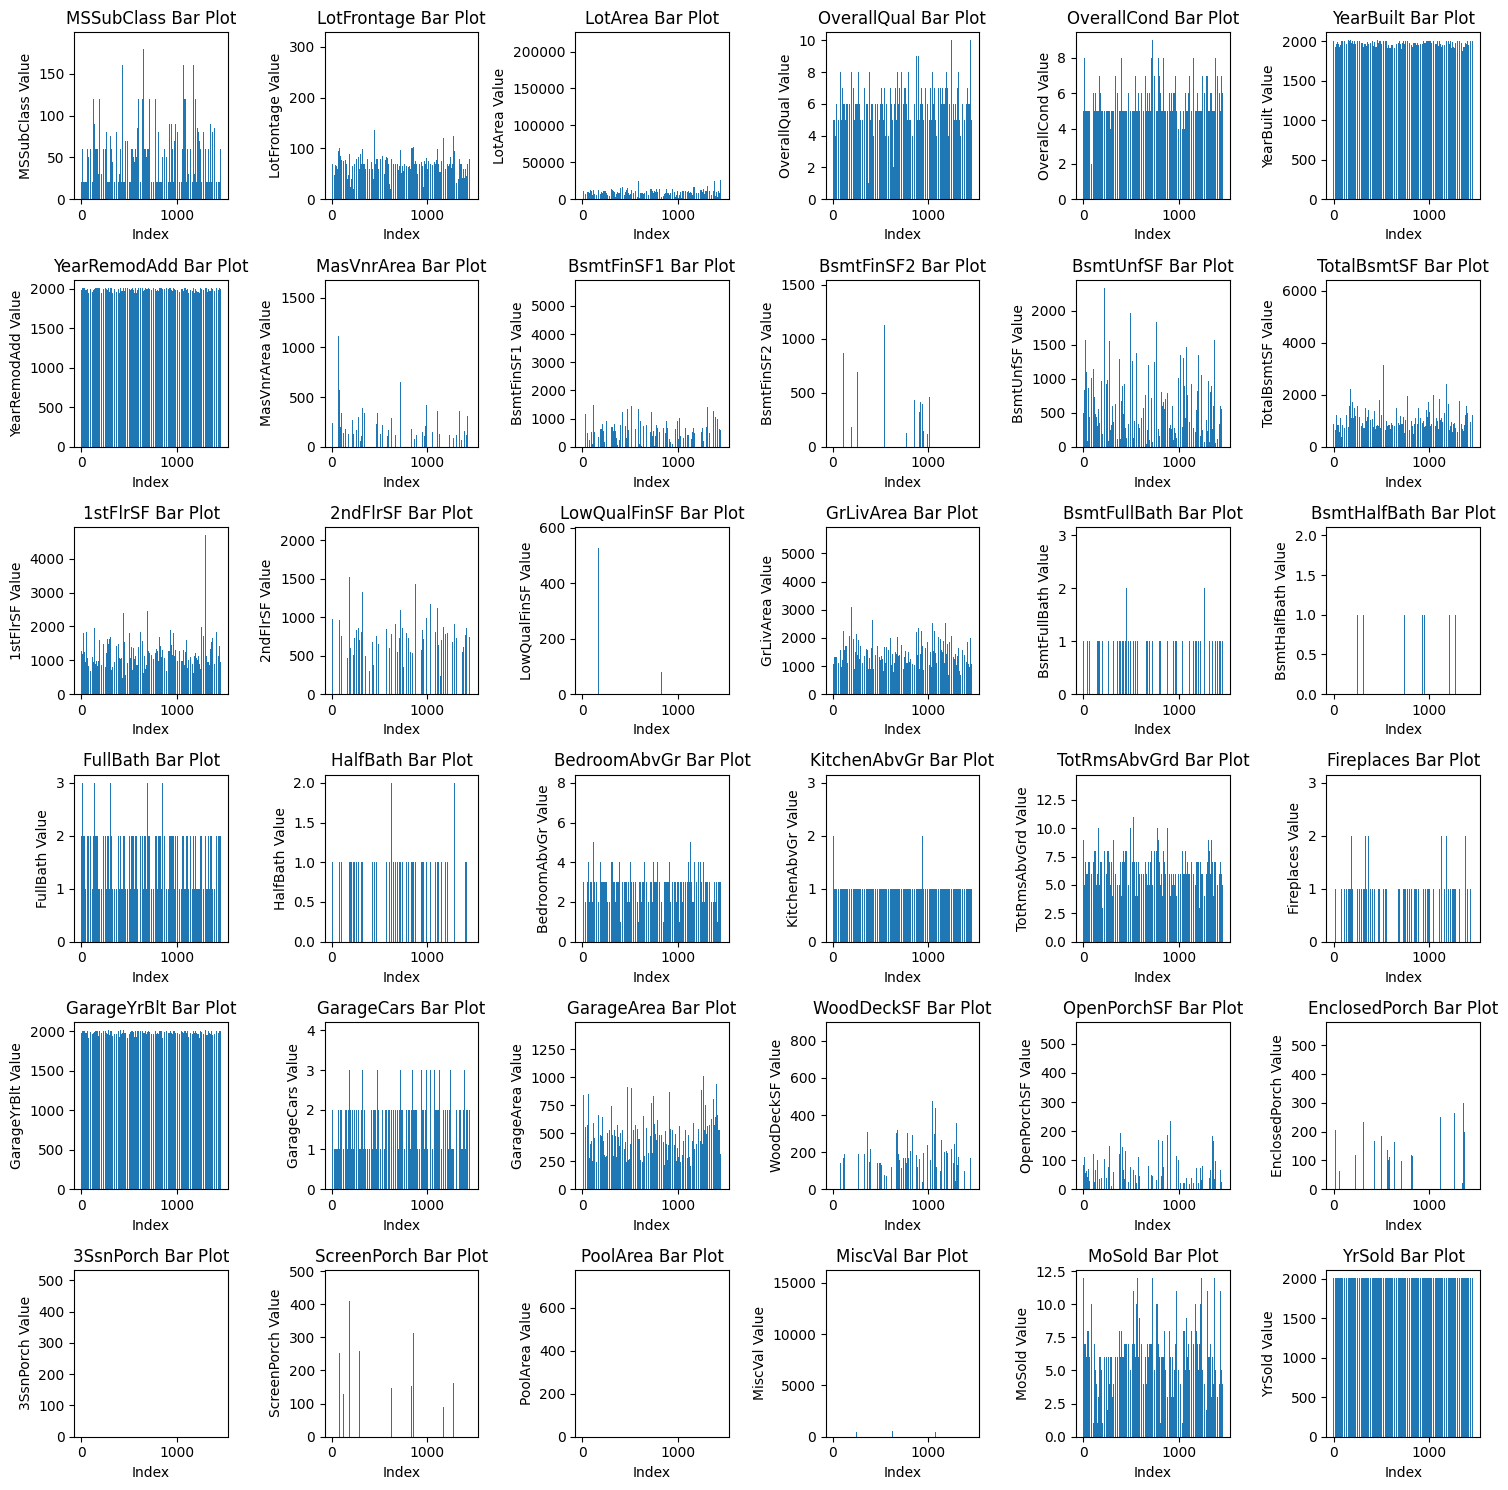

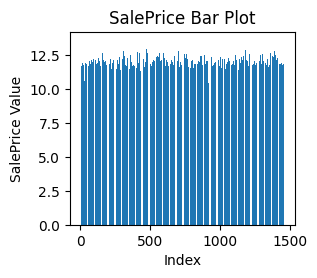

In [74]:
# Obtén todas las características de la columna
caracteristicas = columnaNum.columns.tolist()

# Define el número de subtramas por fila y columna (para organizar los gráficos)
num_filas = 6  # Cambia esto según tus preferencias
num_columnas = 6  # Cambia esto según tus preferencias

# Calcula el número total de subtramas
num_total_subtramas = num_filas * num_columnas

# Calcula el número total de características
num_total_caracteristicas = len(caracteristicas)

# Itera a través de las características y crea gráficos de barras
for i, caracteristica in enumerate(caracteristicas):
    if i % num_total_subtramas == 0:
        # Crea una nueva figura para organizar los gráficos
        plt.figure(figsize=(15, 15))

    # Selecciona la característica actual
    data = columnaNum[caracteristica]

    # Crea un gráfico de barras en la subtrama actual
    plt.subplot(num_filas, num_columnas, (i % num_total_subtramas) + 1)
    plt.bar(data.index, data.values)
    plt.title(f'{caracteristica} Bar Plot')
    plt.xlabel('Index')
    plt.ylabel(f'{caracteristica} Value')

    # Si hemos completado una fila de gráficos, muestra la figura actual
    if (i + 1) % num_total_subtramas == 0 or i == num_total_caracteristicas - 1:
        plt.tight_layout()
        plt.show()


##5.1.2 Plot Categorical Data

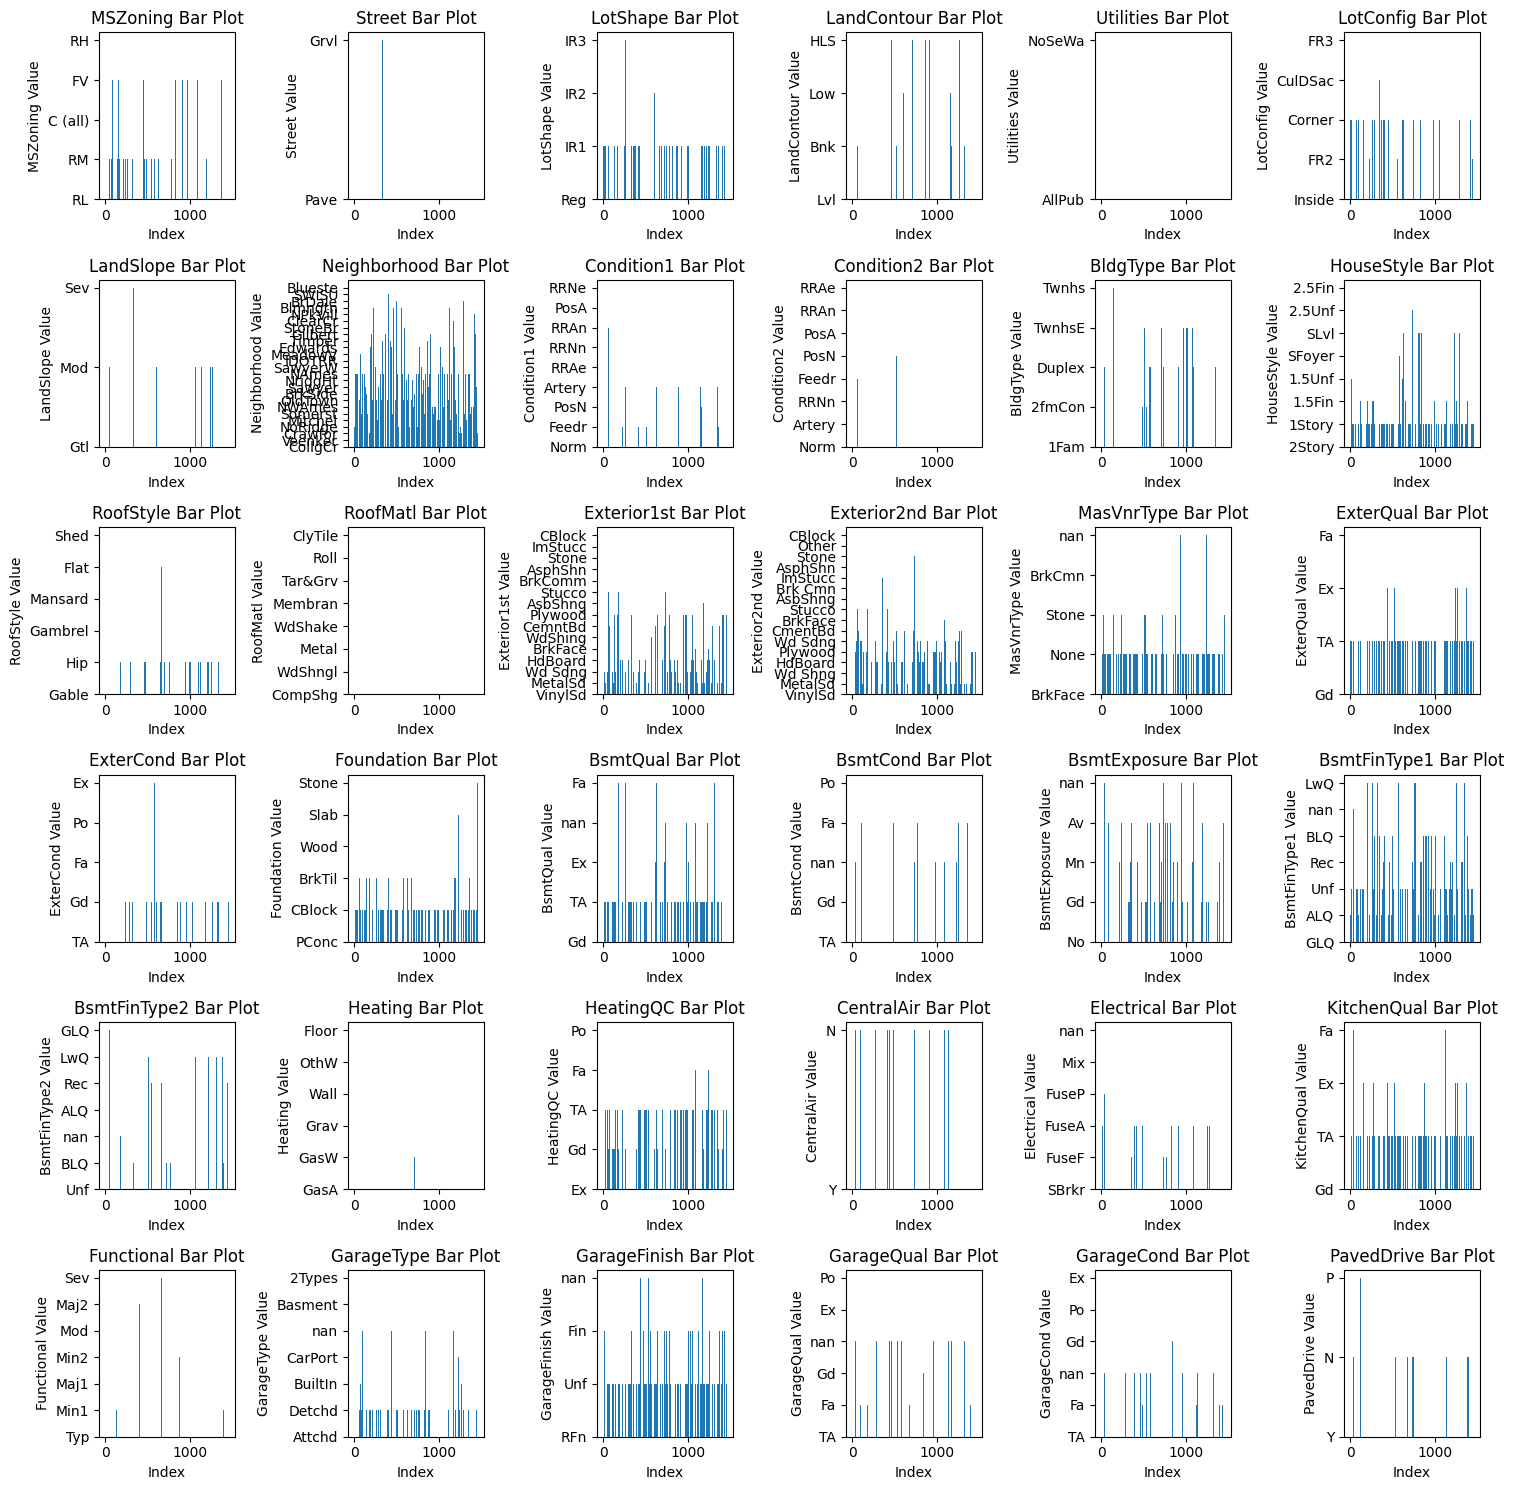

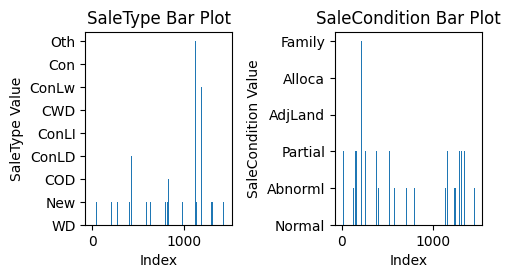

In [78]:
# Obtén todas las características de la columna
caracteristicas = columnaCat.columns.tolist()

# Define el número de subtramas por fila y columna (para organizar los gráficos)
num_filas = 6  # Cambia esto según tus preferencias
num_columnas = 6  # Cambia esto según tus preferencias

# Calcula el número total de subtramas
num_total_subtramas = num_filas * num_columnas

# Calcula el número total de características
num_total_caracteristicas = len(caracteristicas)

# Itera a través de las características y crea gráficos de barras
for i, caracteristica in enumerate(caracteristicas):
    if i % num_total_subtramas == 0:
        # Crea una nueva figura para organizar los gráficos
        plt.figure(figsize=(15, 15))

    # Selecciona la característica actual
    data = columnaCat[caracteristica]

    # Crea un gráfico de barras en la subtrama actual
    plt.subplot(num_filas, num_columnas, (i % num_total_subtramas) + 1)
    plt.bar(data.index, data.astype(str).values)
    plt.title(f'{caracteristica} Bar Plot')
    plt.xlabel('Index')
    plt.ylabel(f'{caracteristica} Value')

    # Si hemos completado una fila de gráficos, muestra la figura actual
    if (i + 1) % num_total_subtramas == 0 or i == num_total_caracteristicas - 1:
        plt.tight_layout()
        plt.show()

##5.2 Análisis-Bivariable


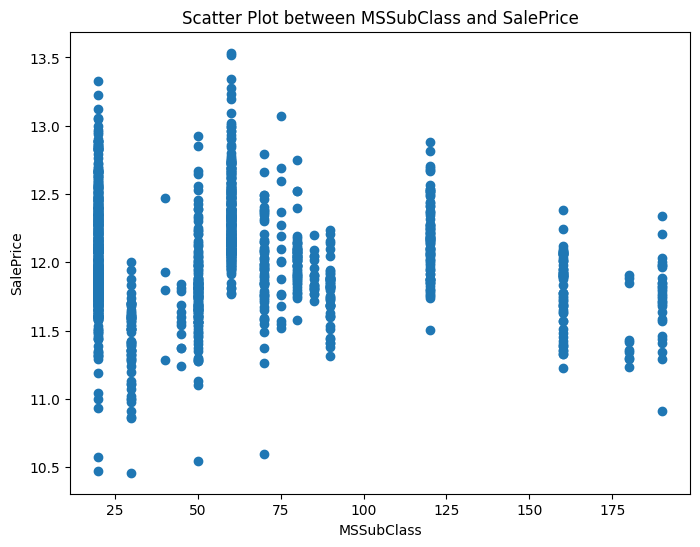

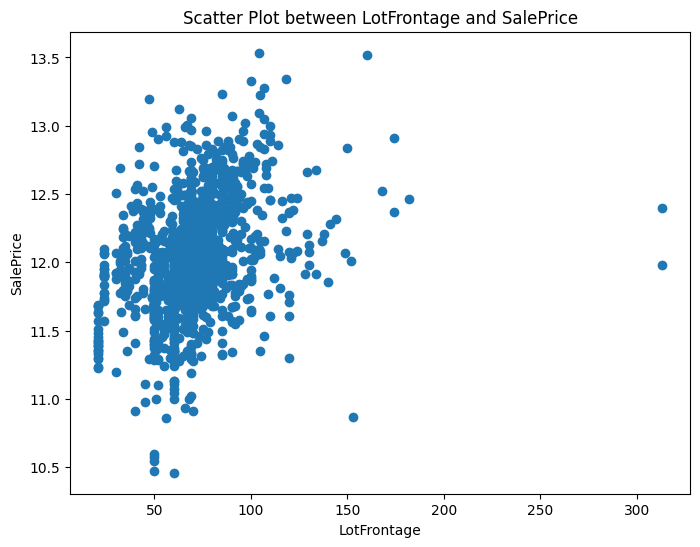

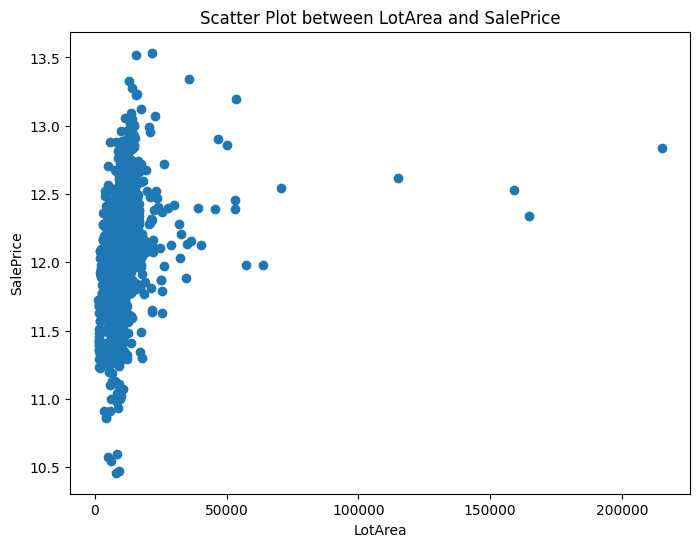

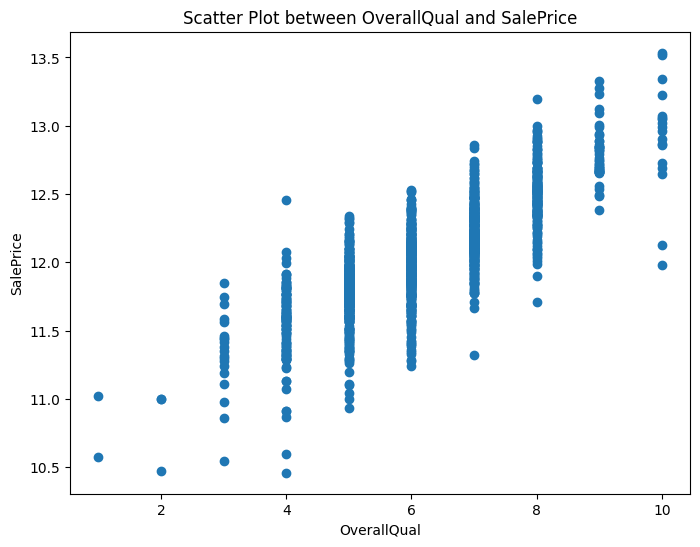

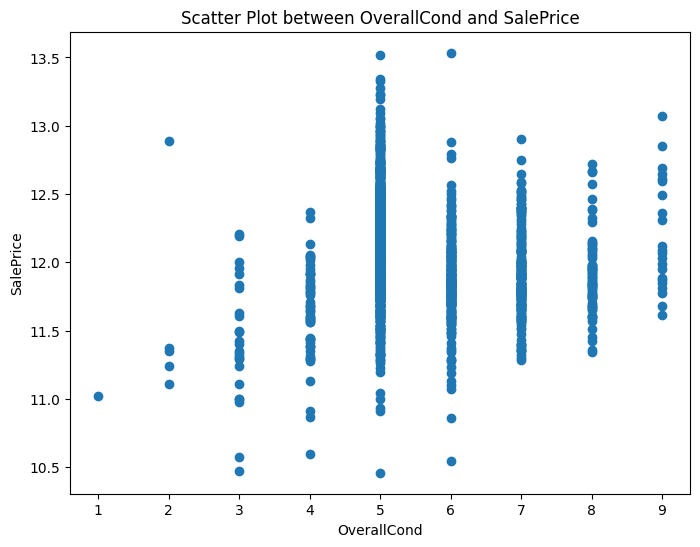

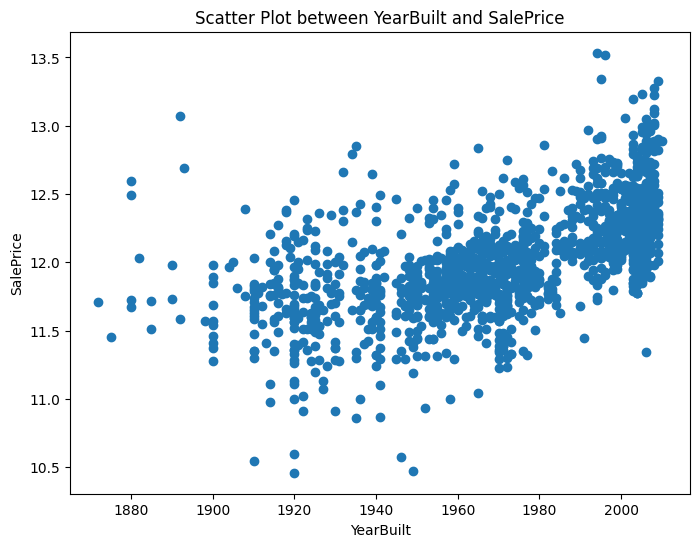

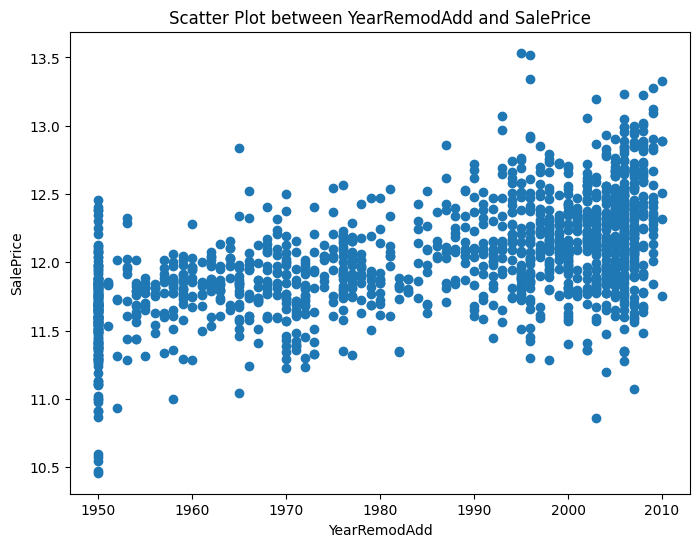

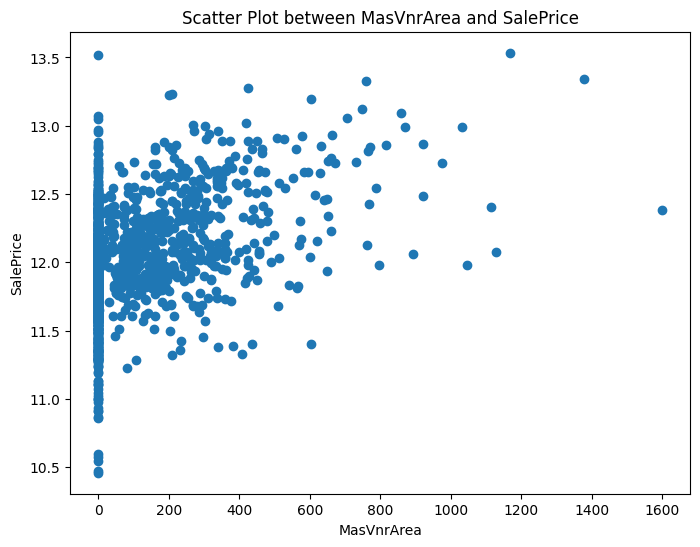

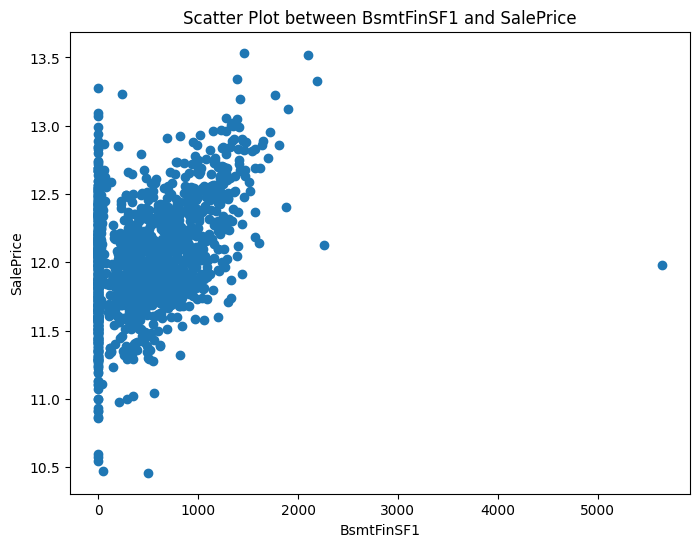

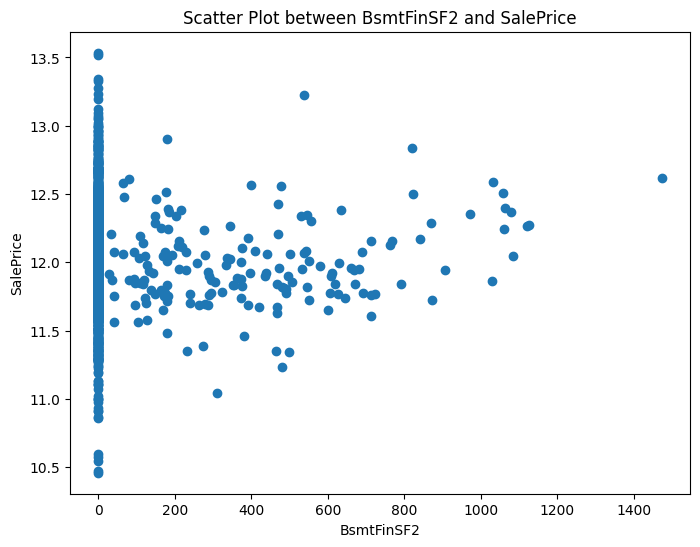

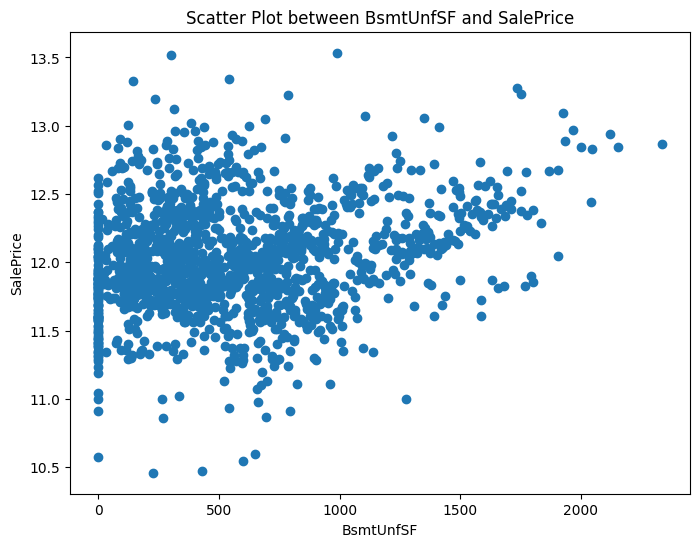

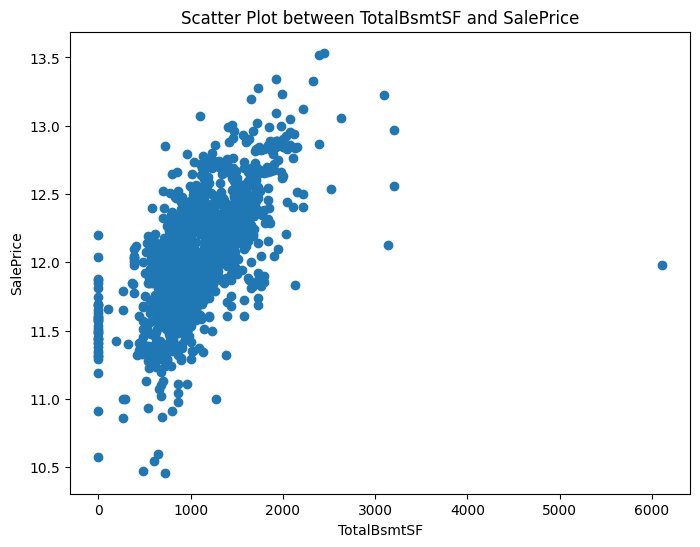

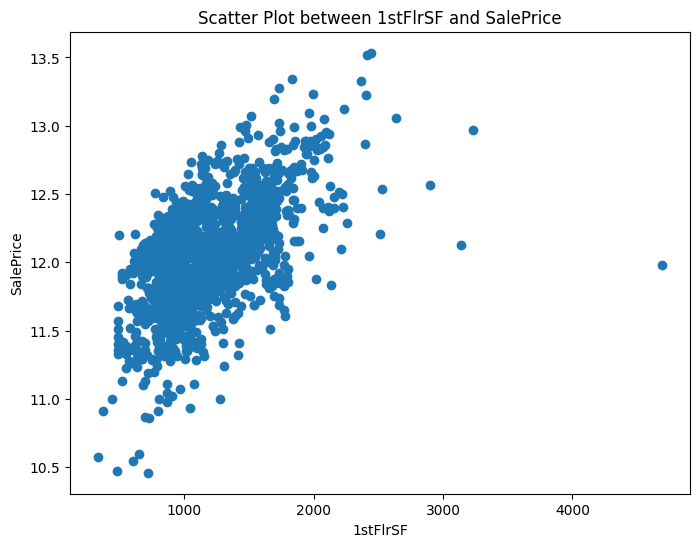

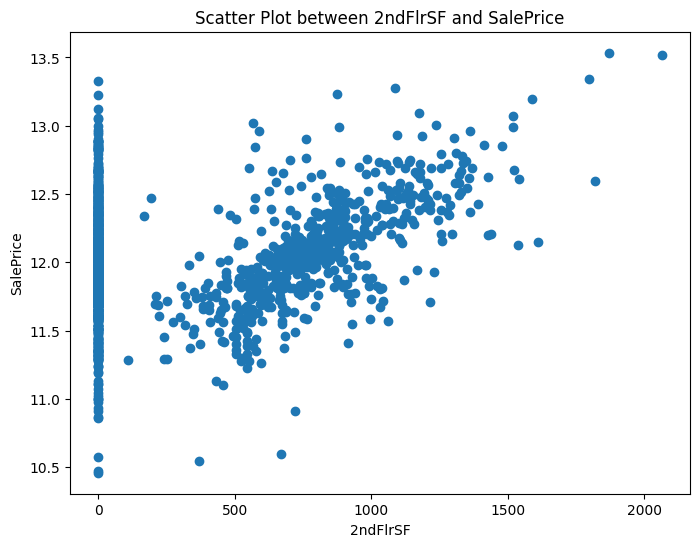

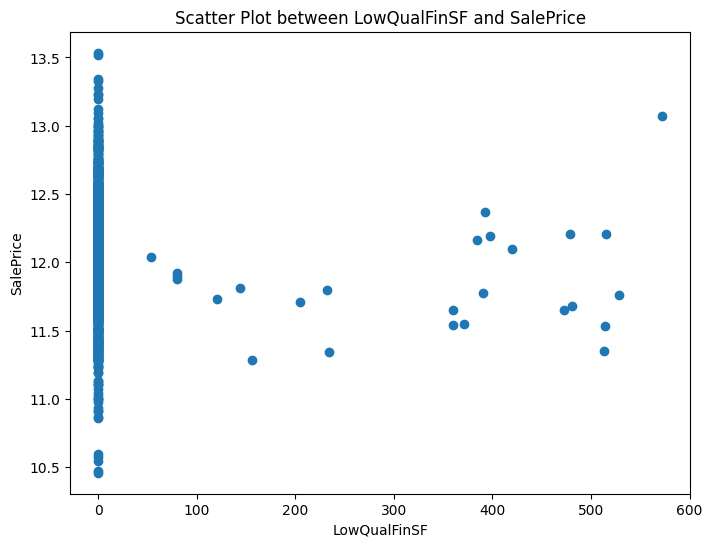

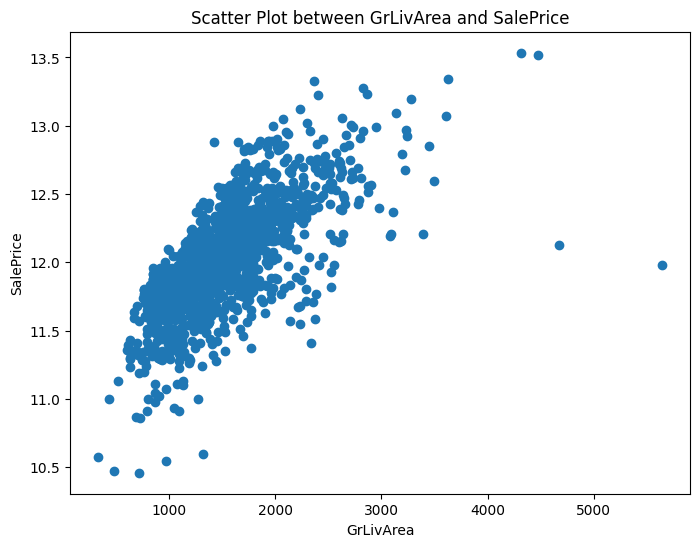

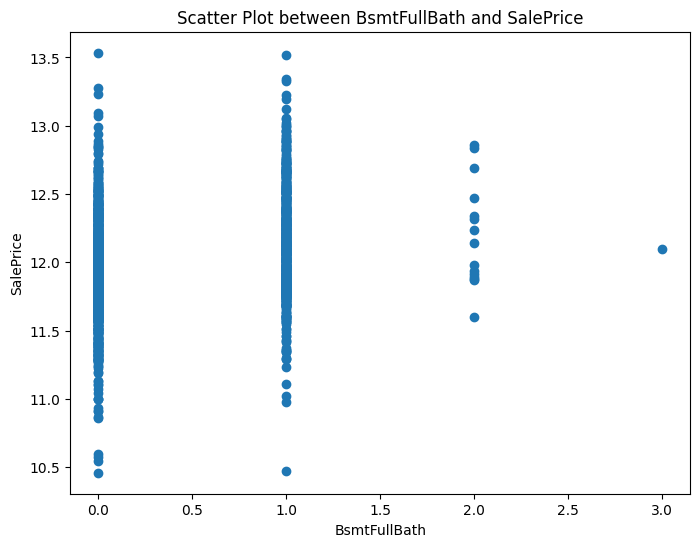

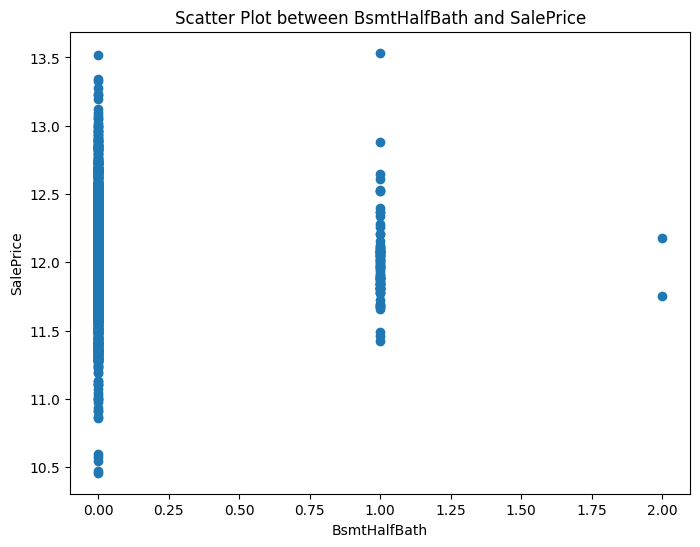

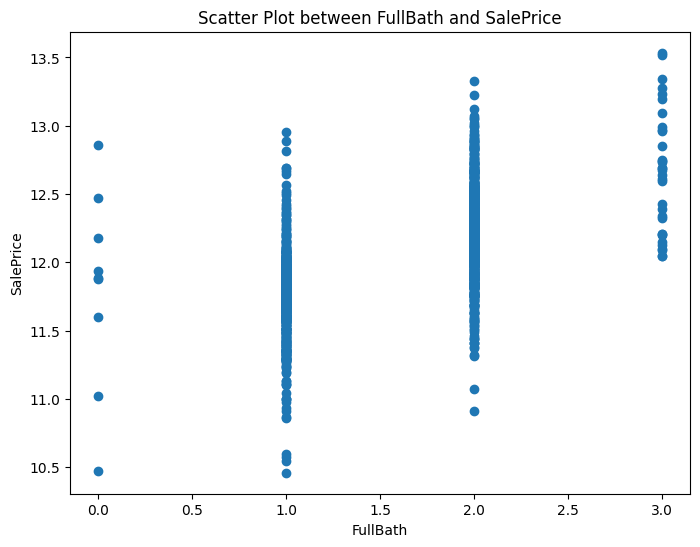

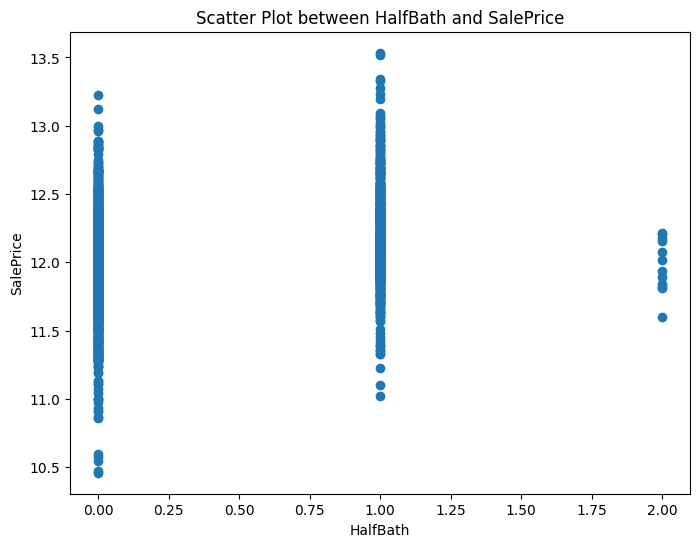

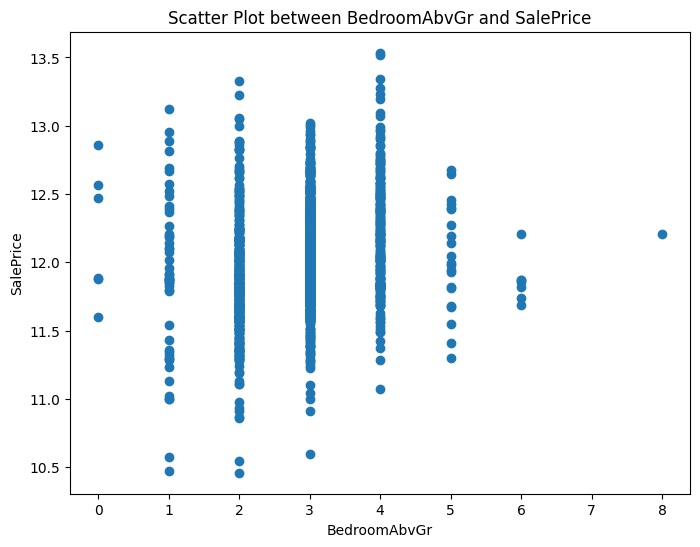

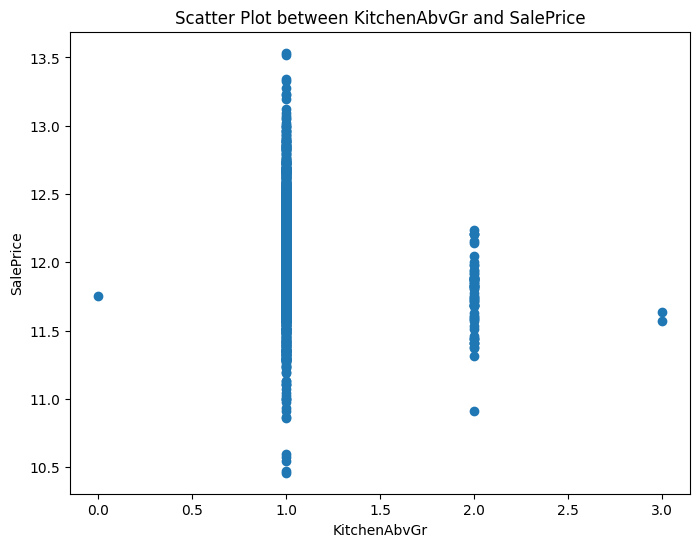

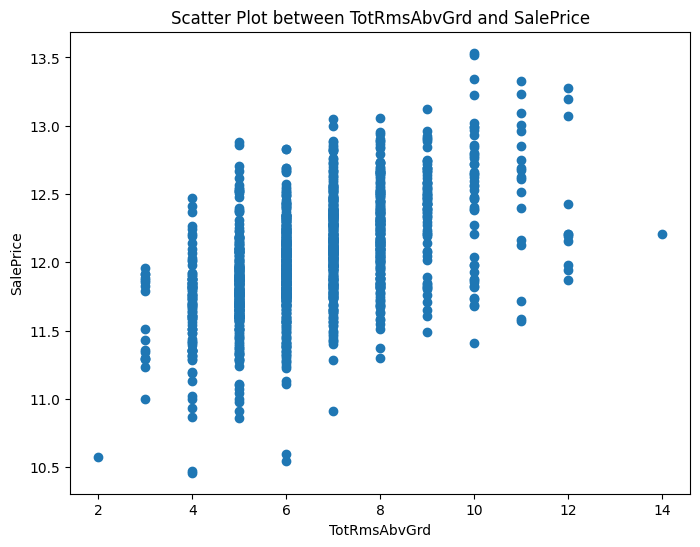

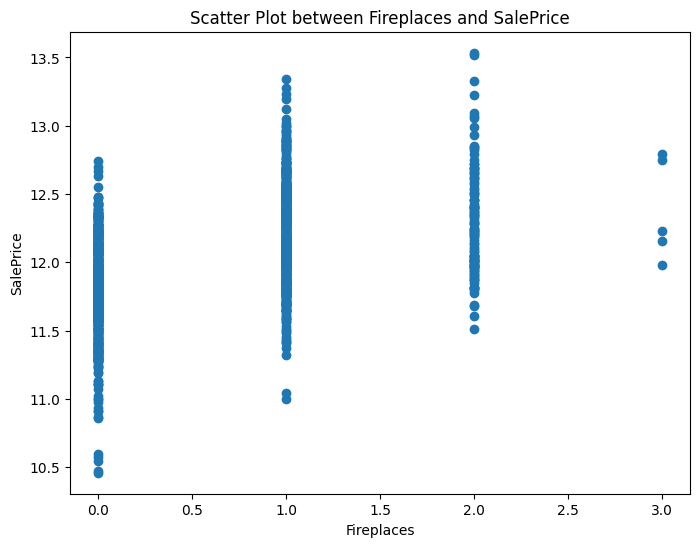

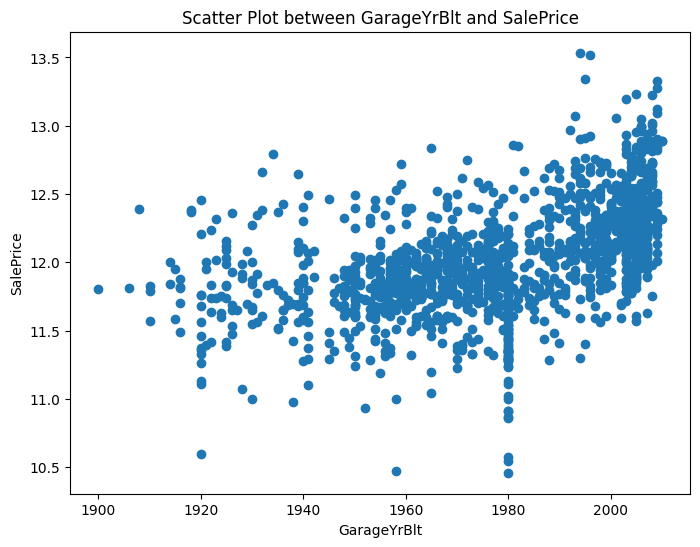

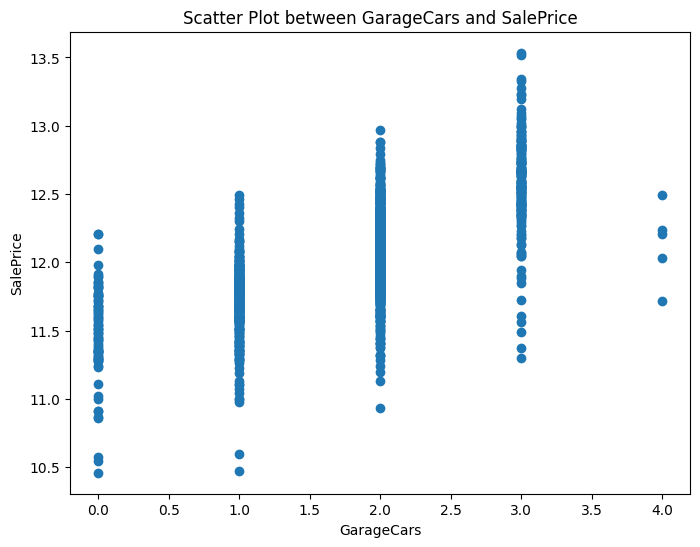

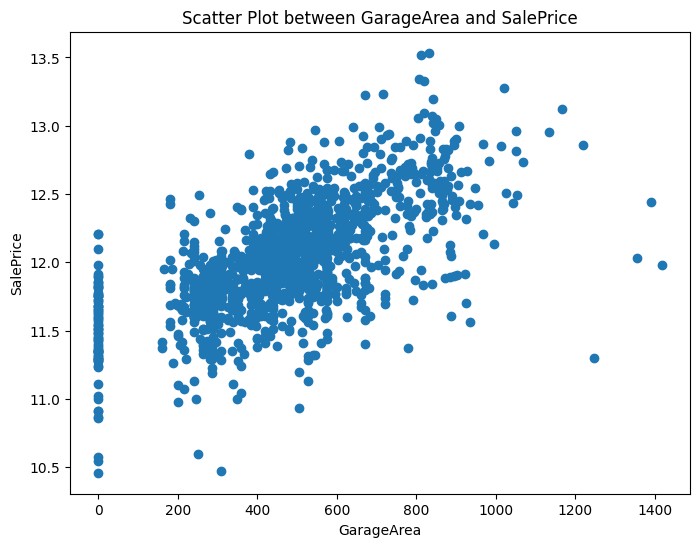

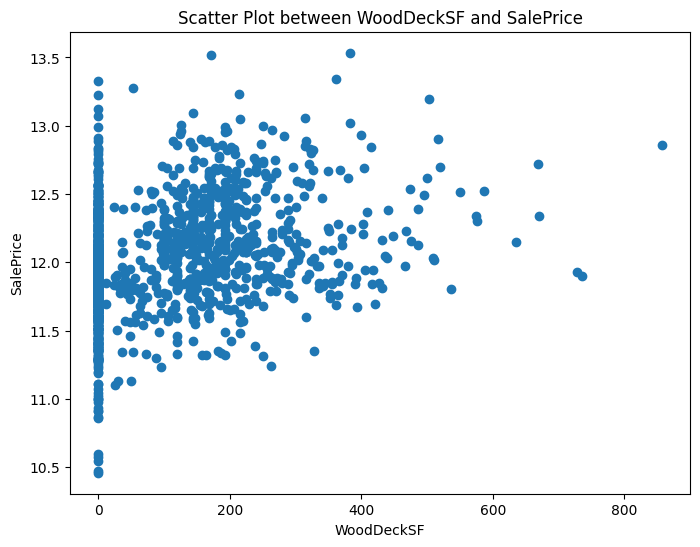

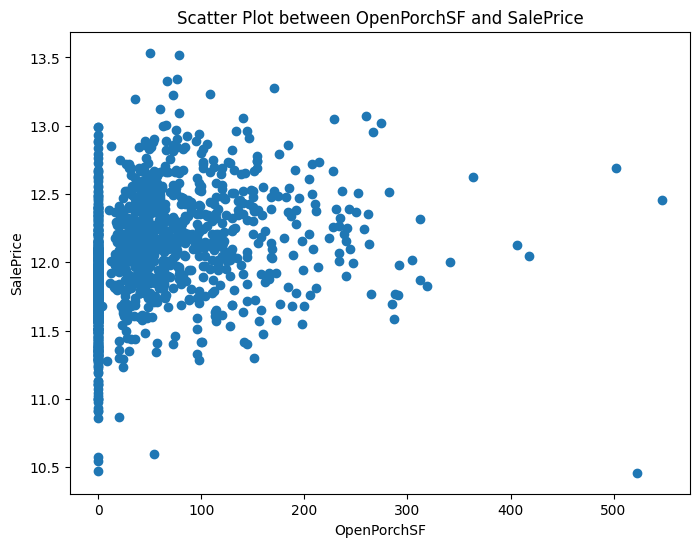

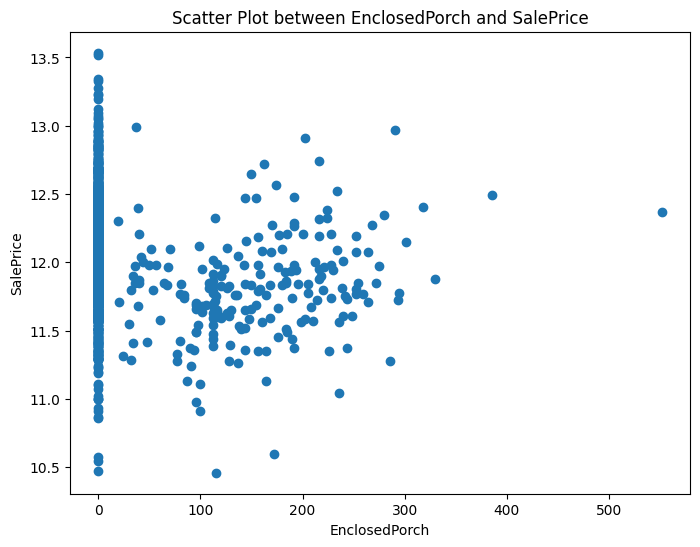

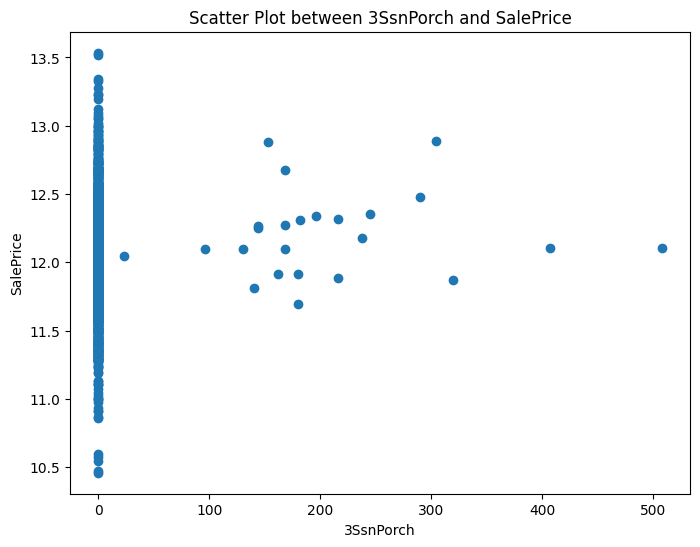

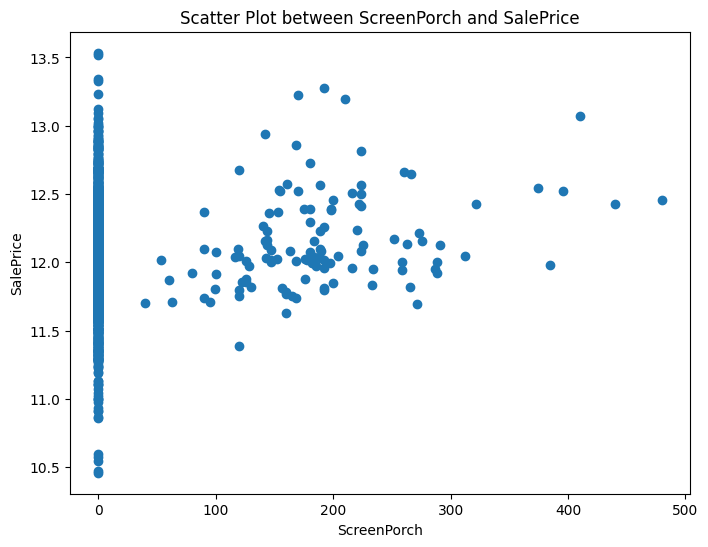

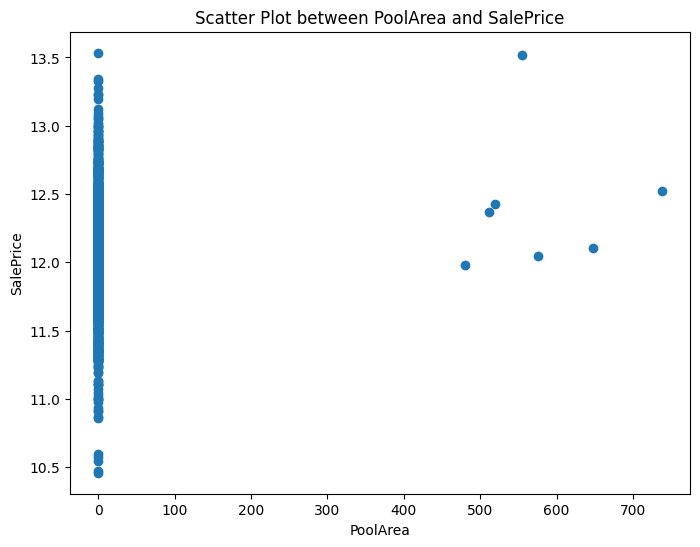

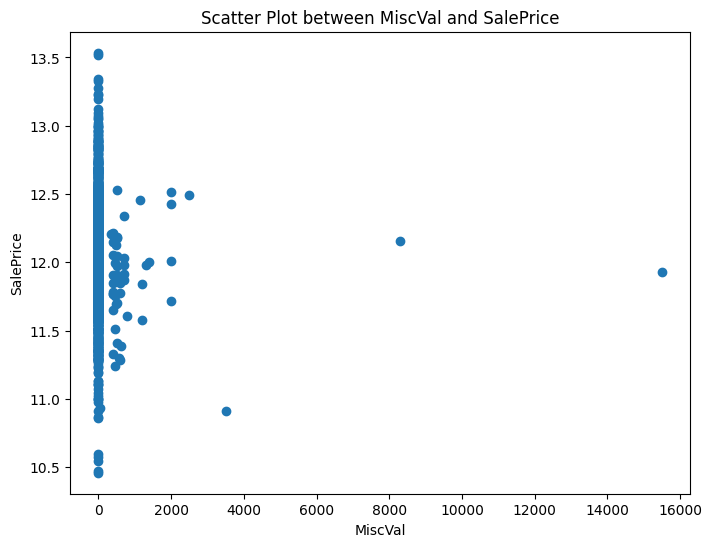

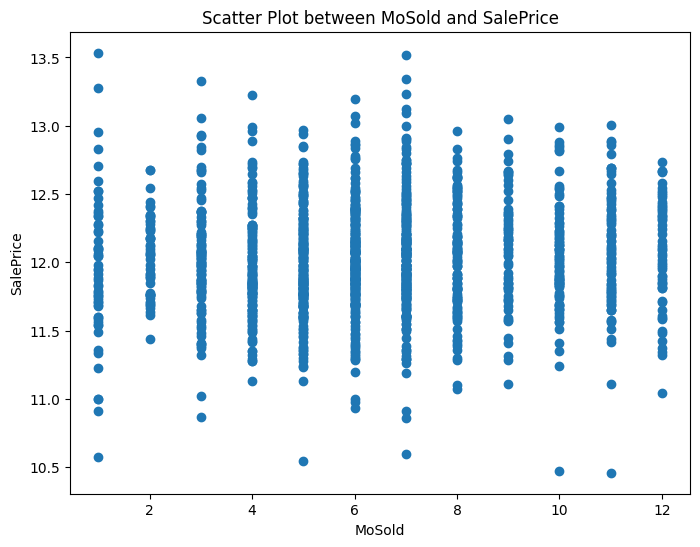

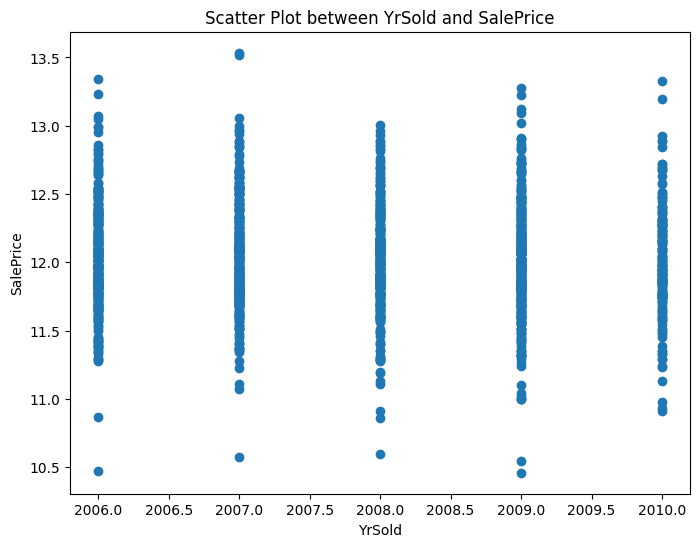

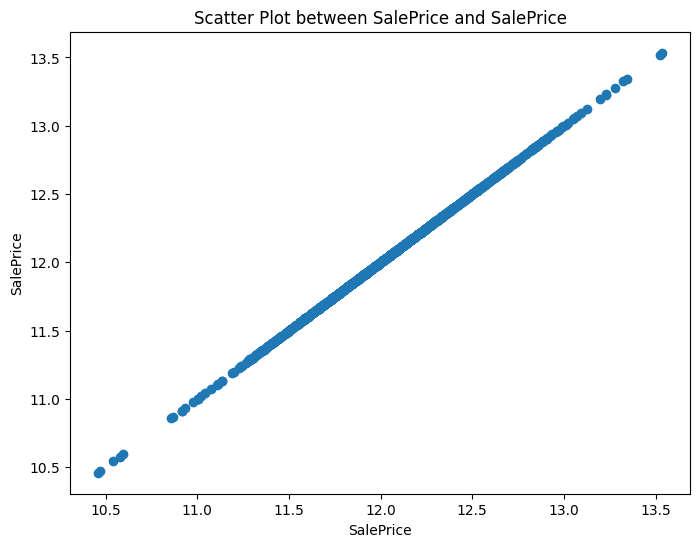

In [79]:
import matplotlib.pyplot as plt

# Gráfico de dispersión entre cada característica en columnaNum y SalePrice
for feature in columnaNum.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(columnaNum[feature], raw_data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'Scatter Plot between {feature} and SalePrice')
    plt.show()


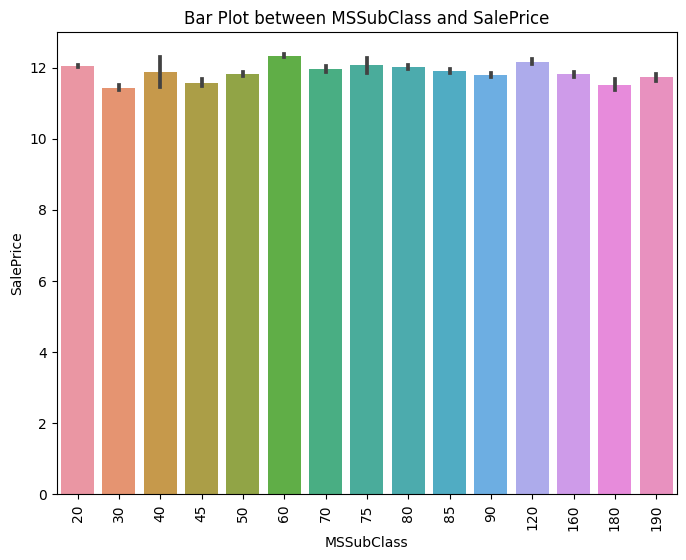

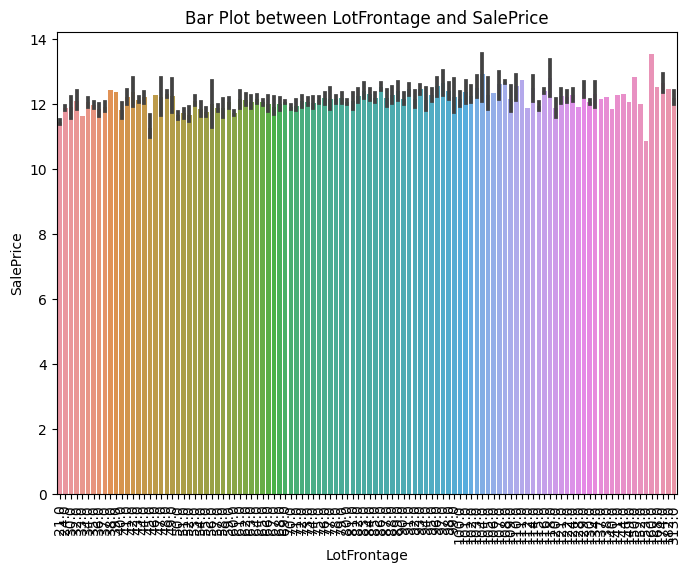

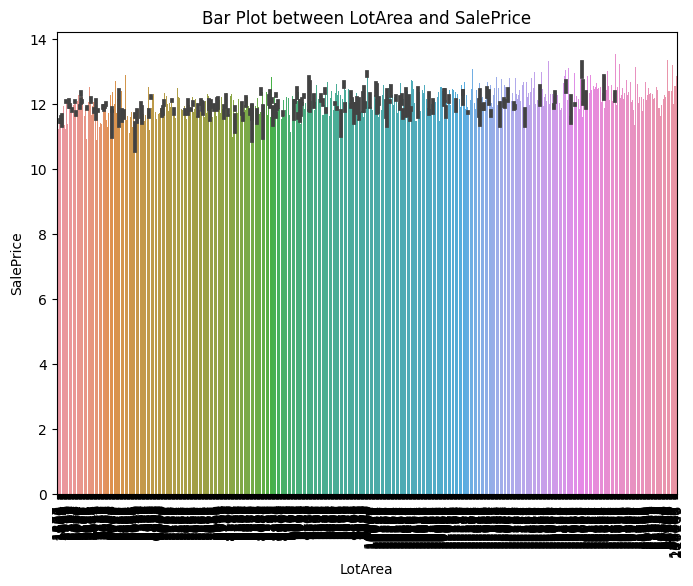

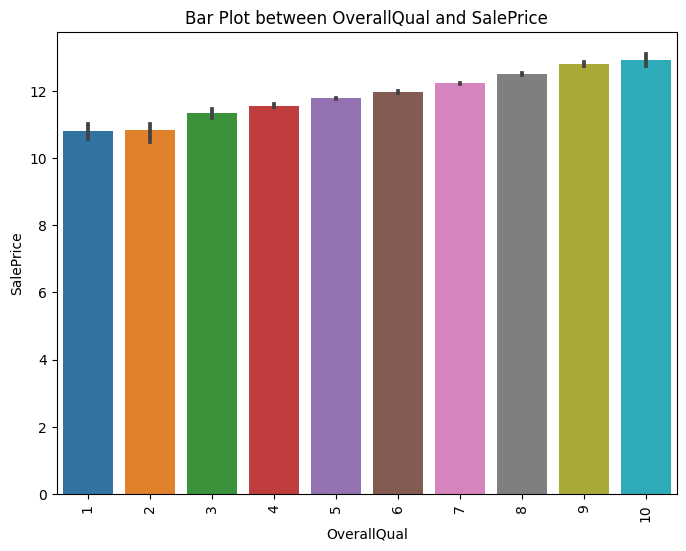

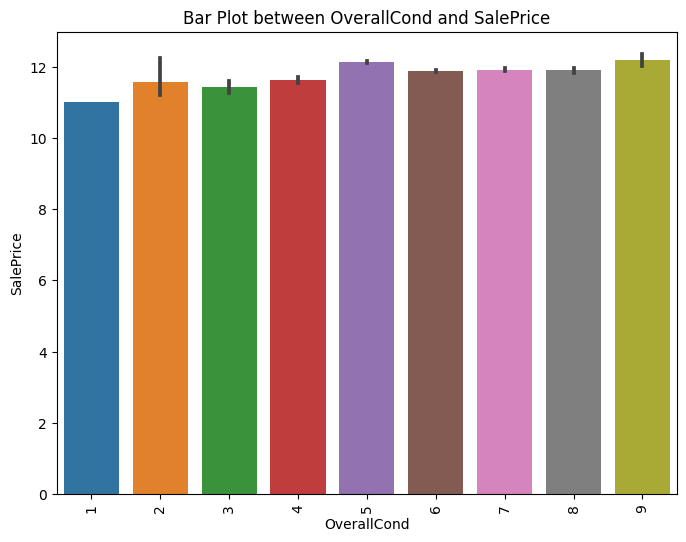

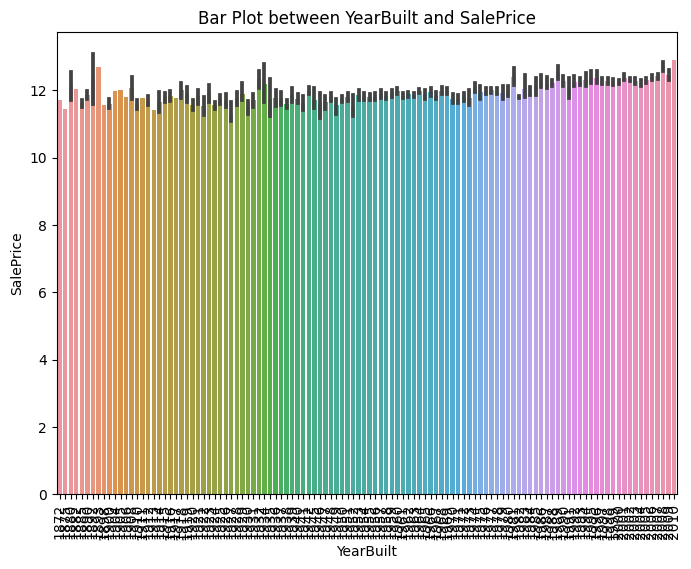

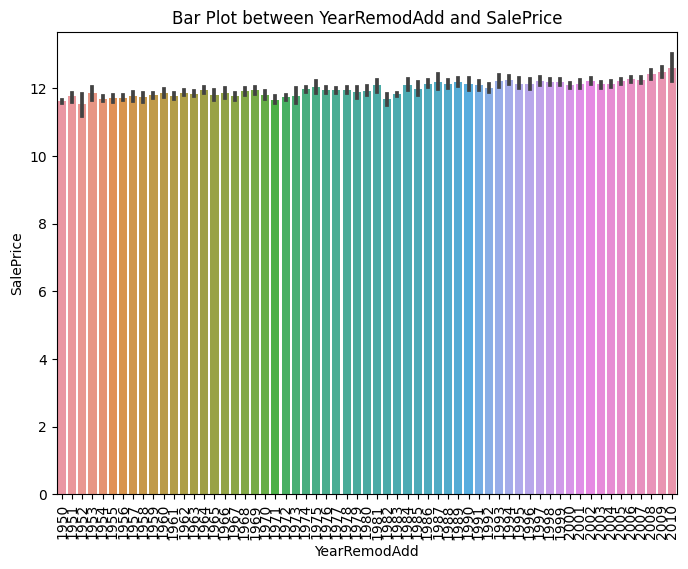

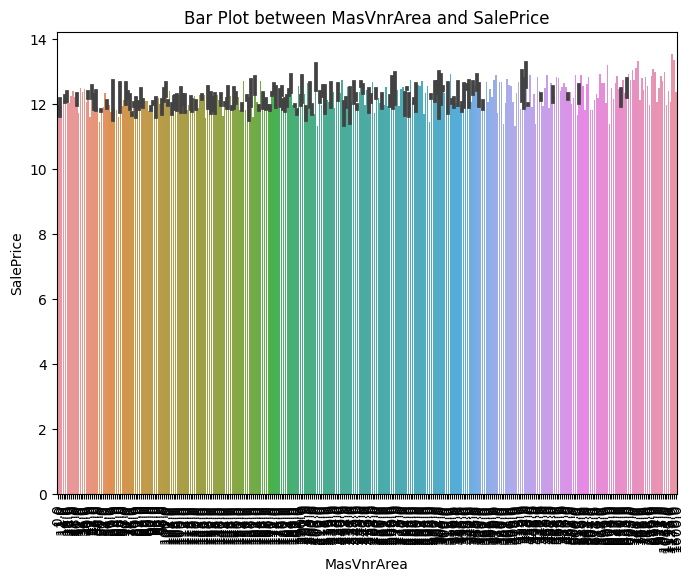

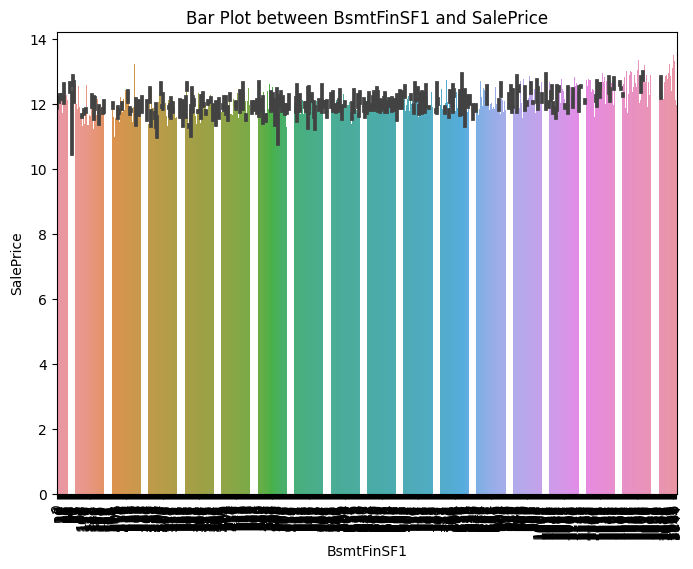

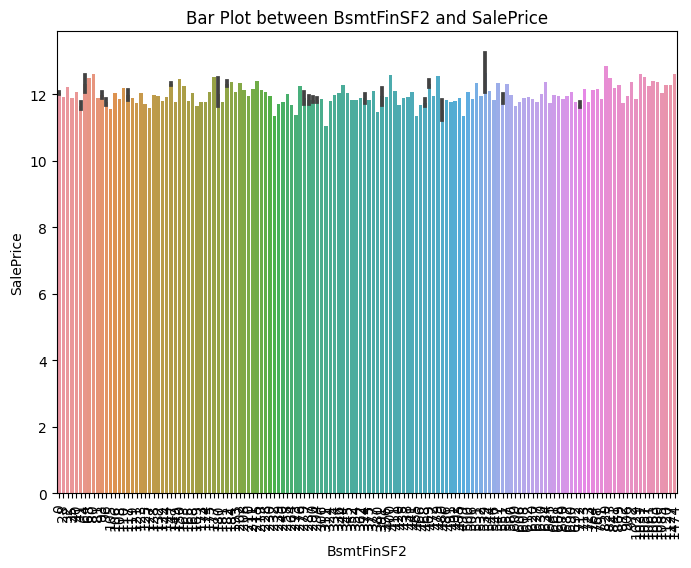

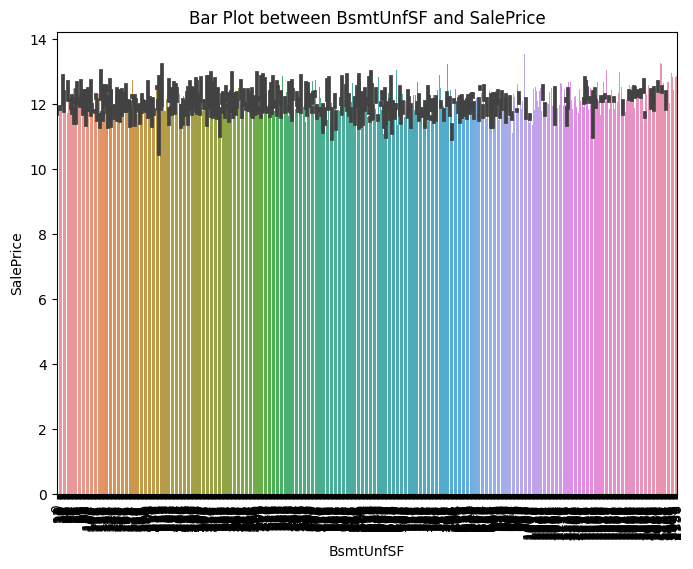

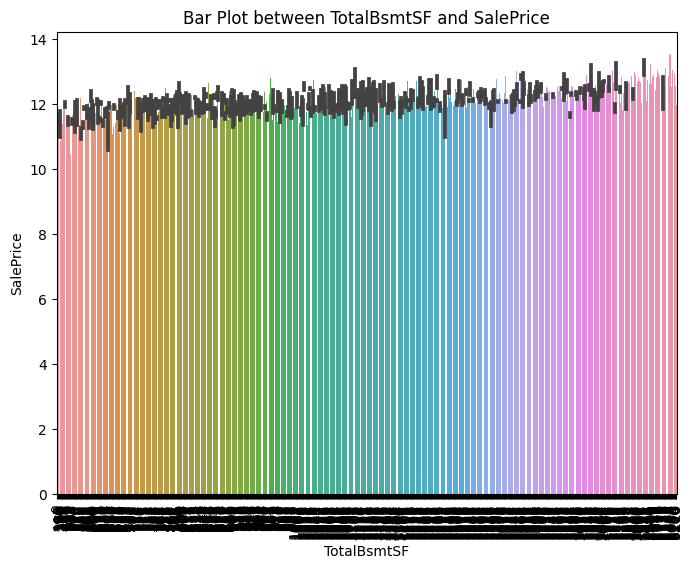

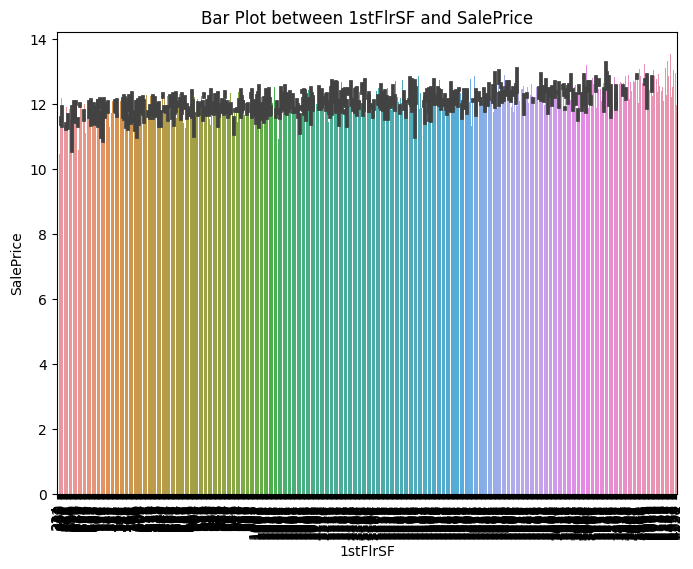

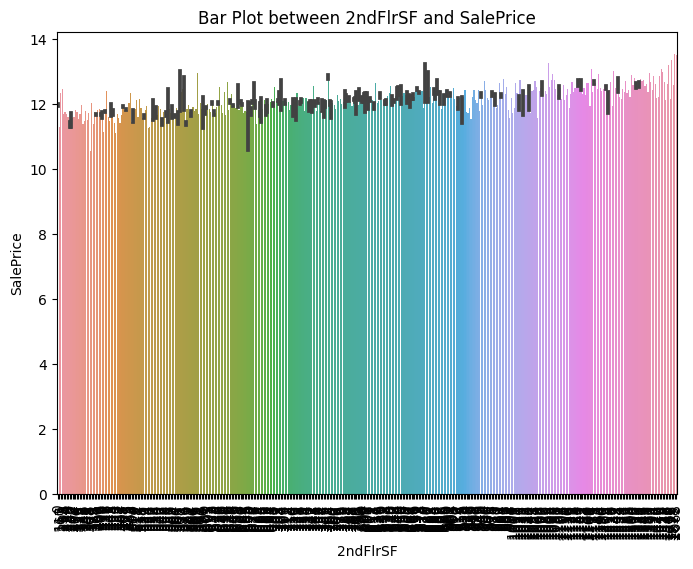

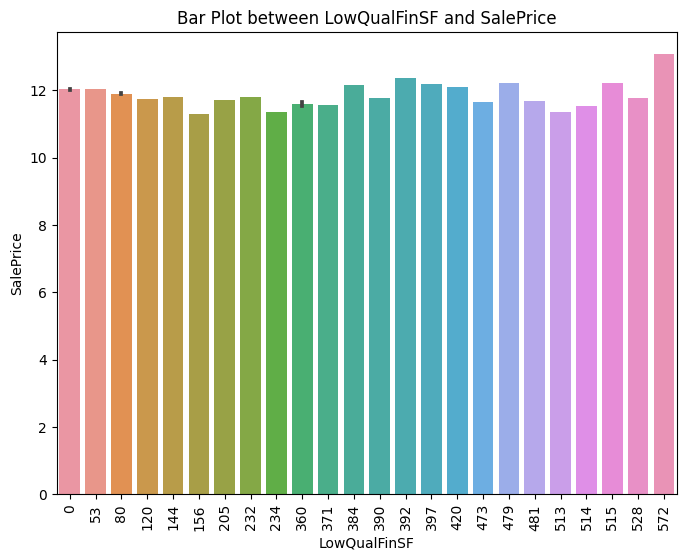

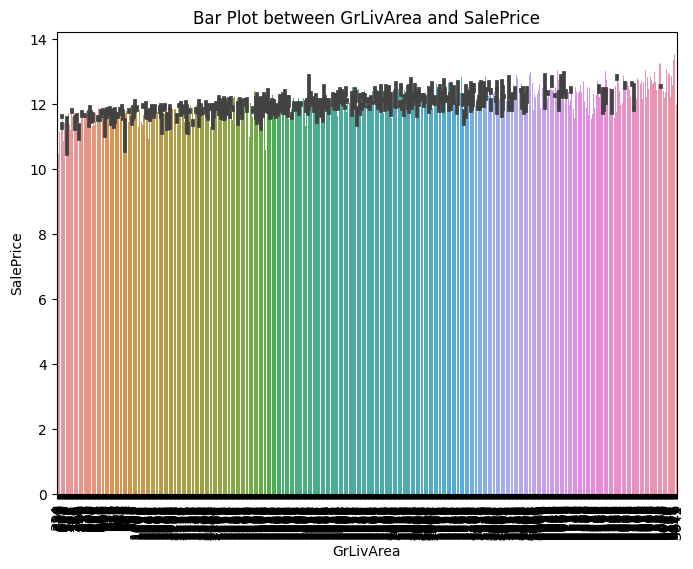

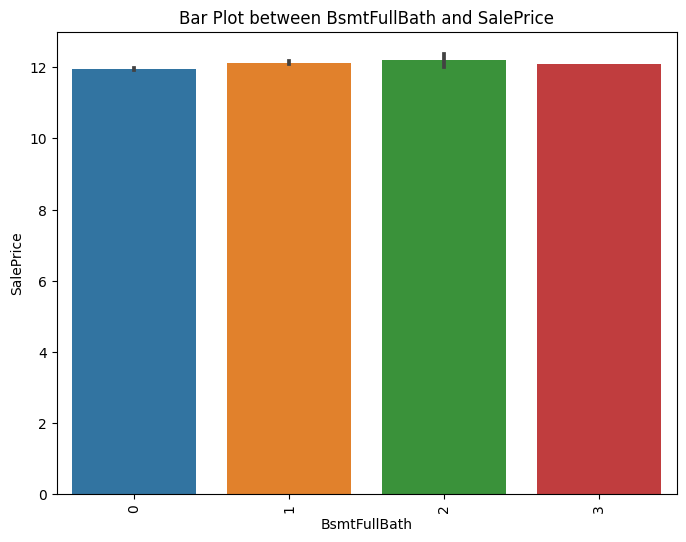

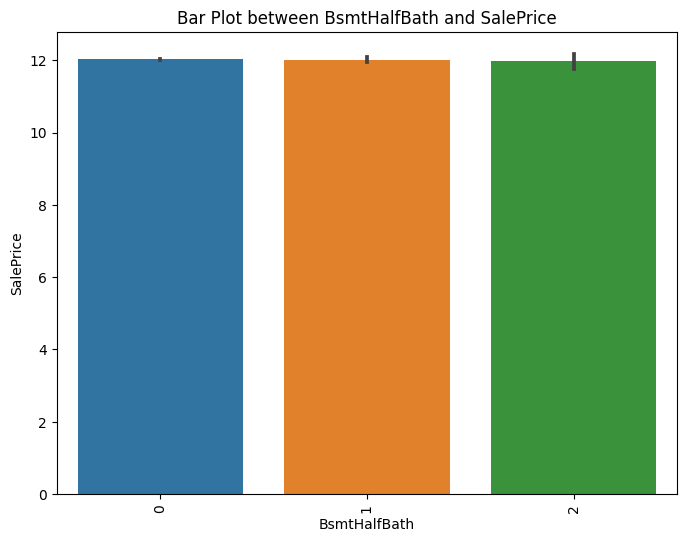

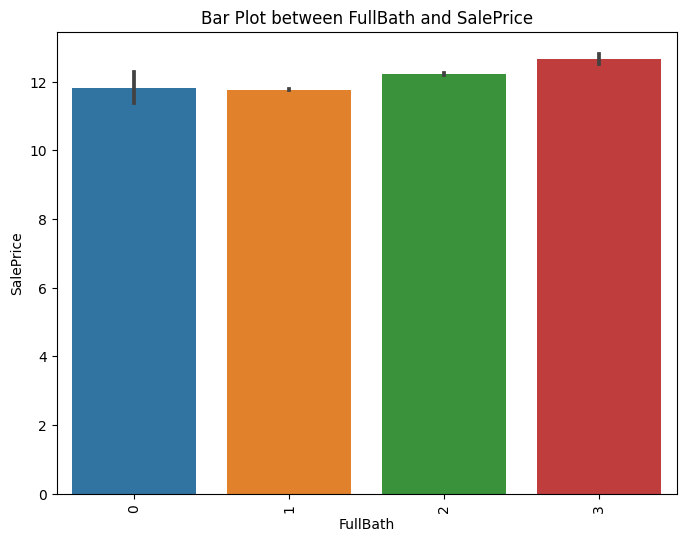

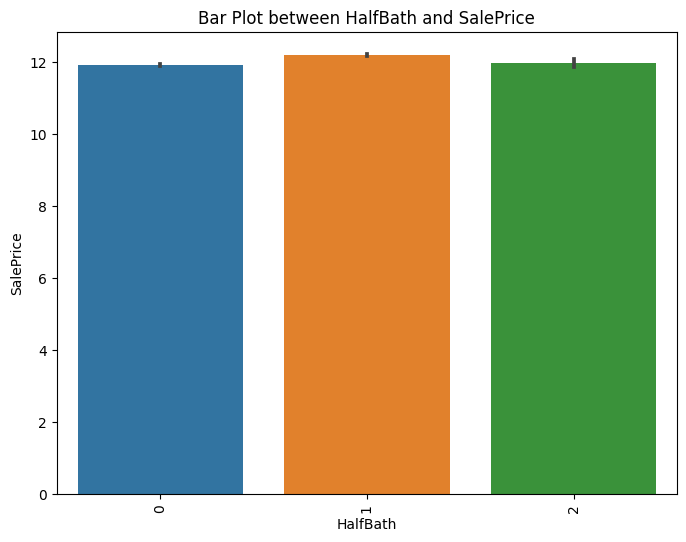

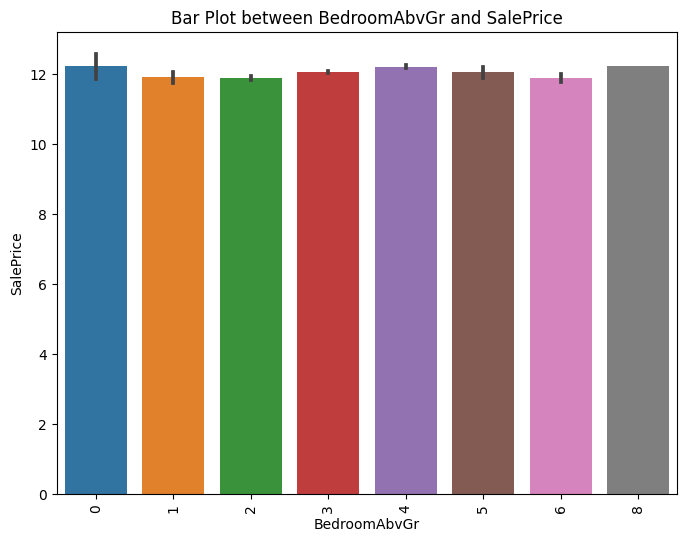

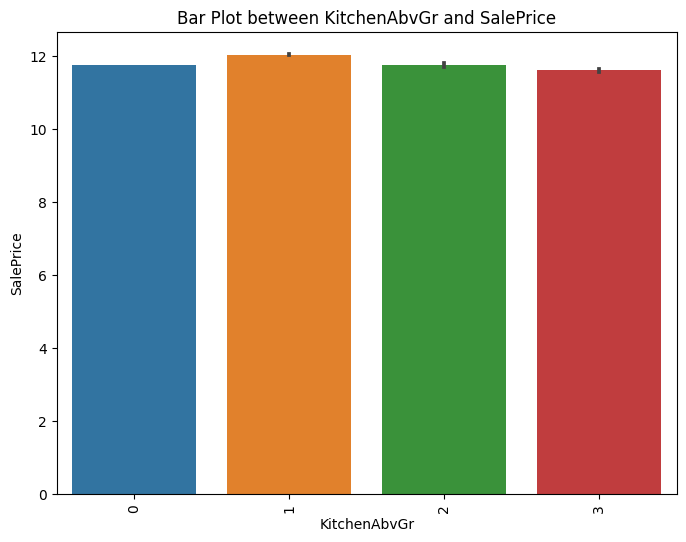

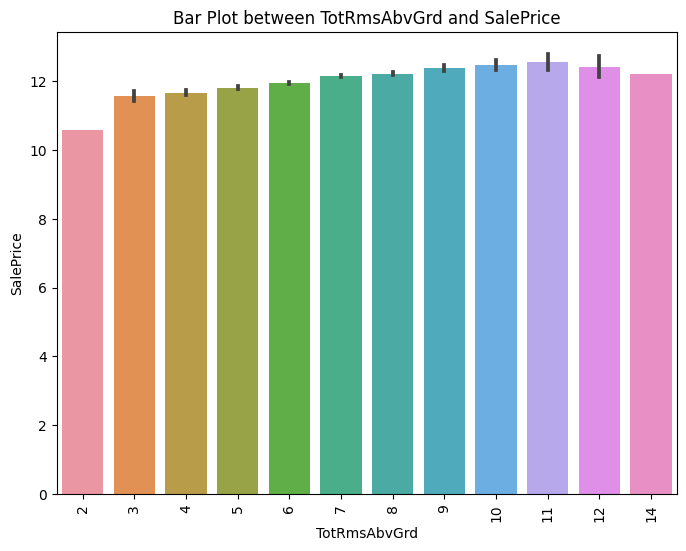

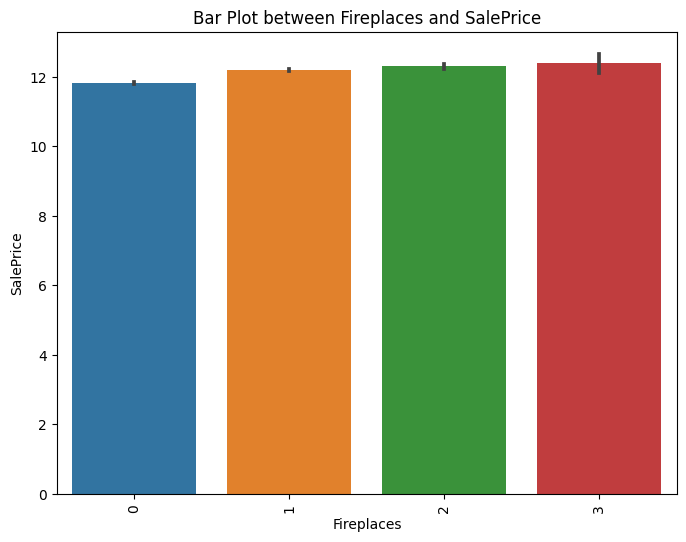

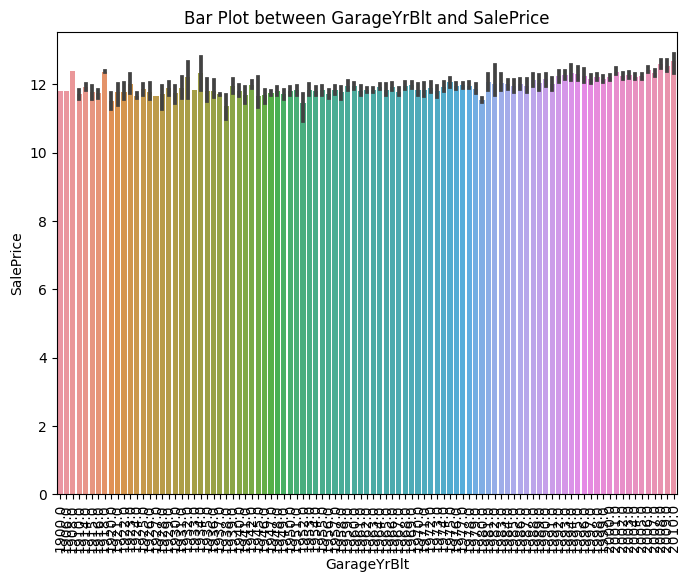

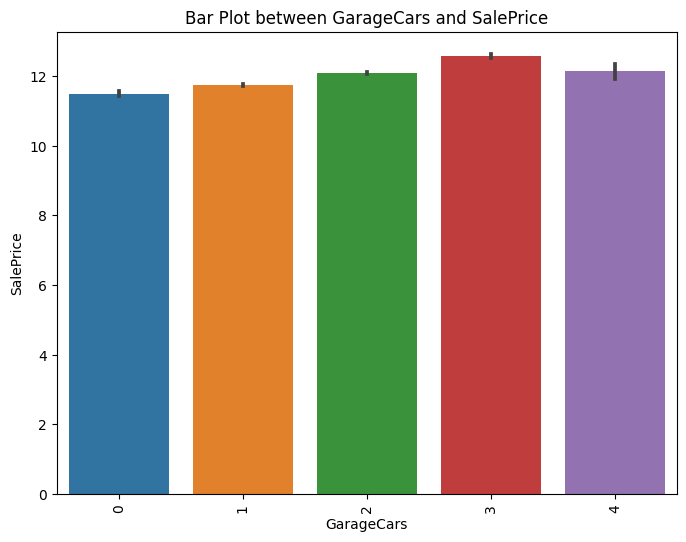

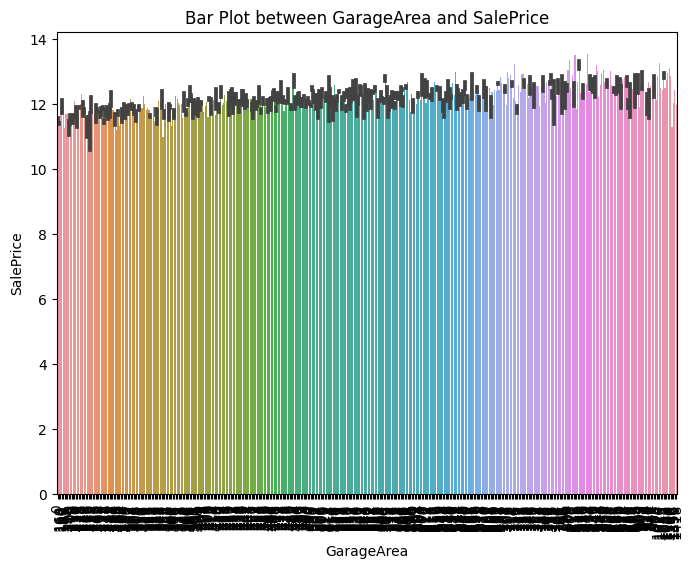

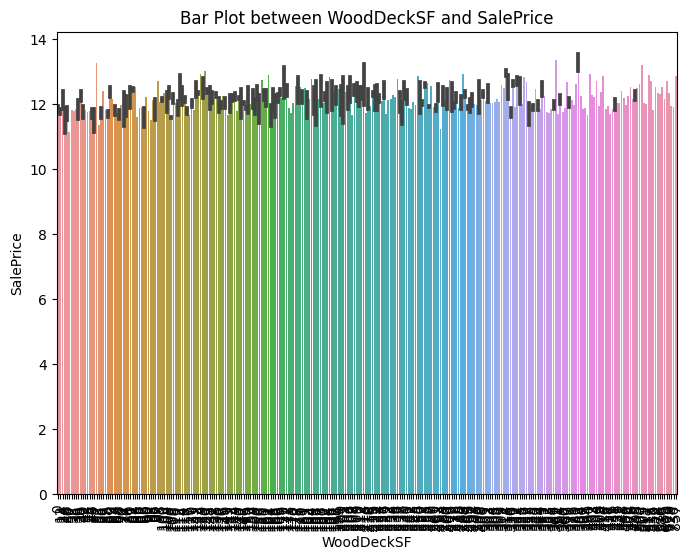

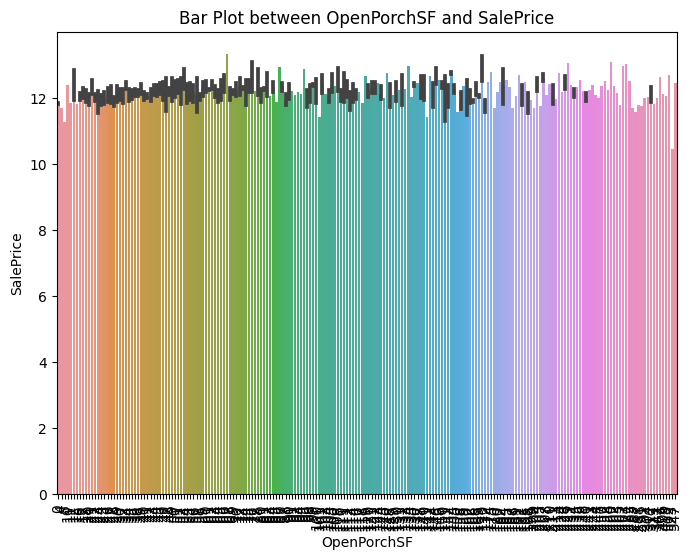

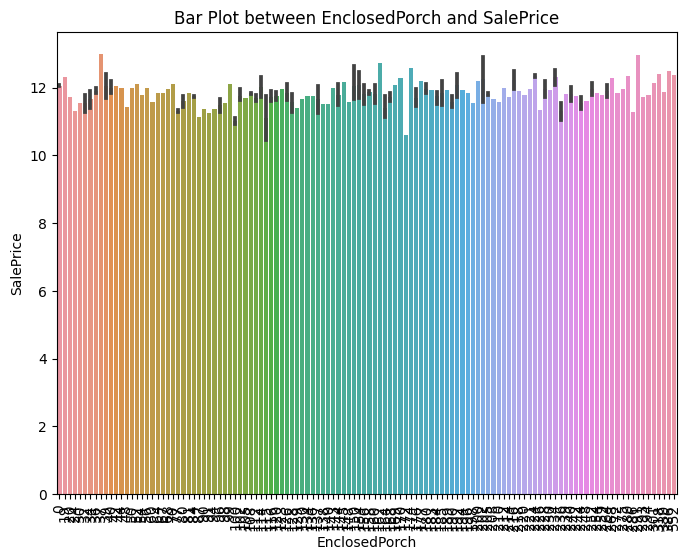

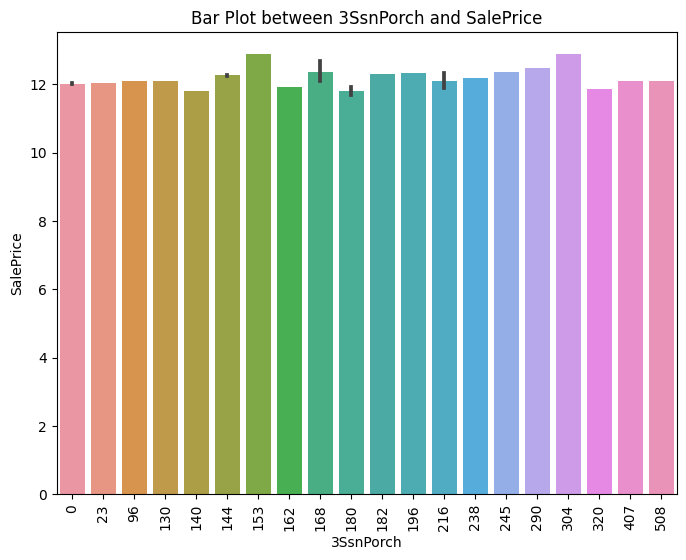

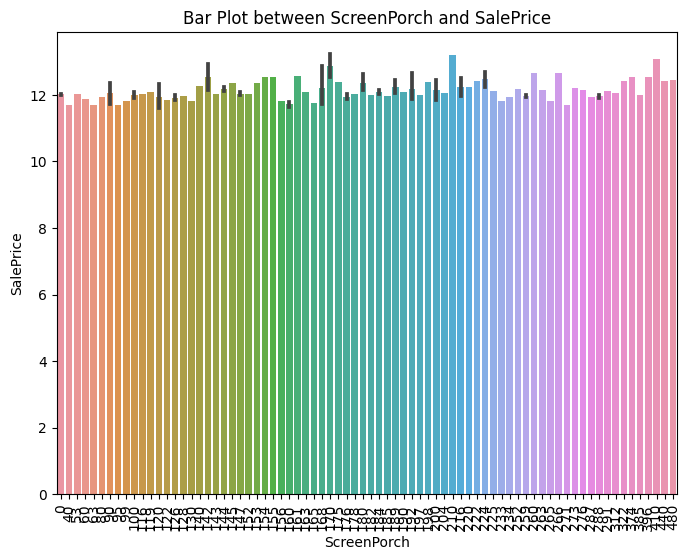

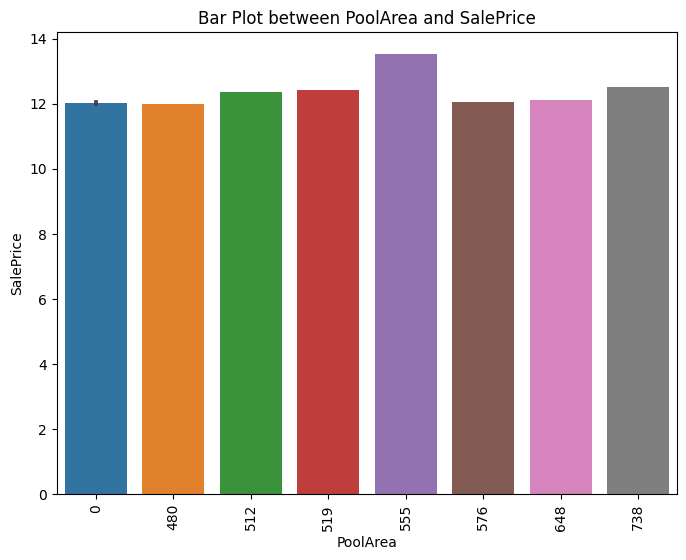

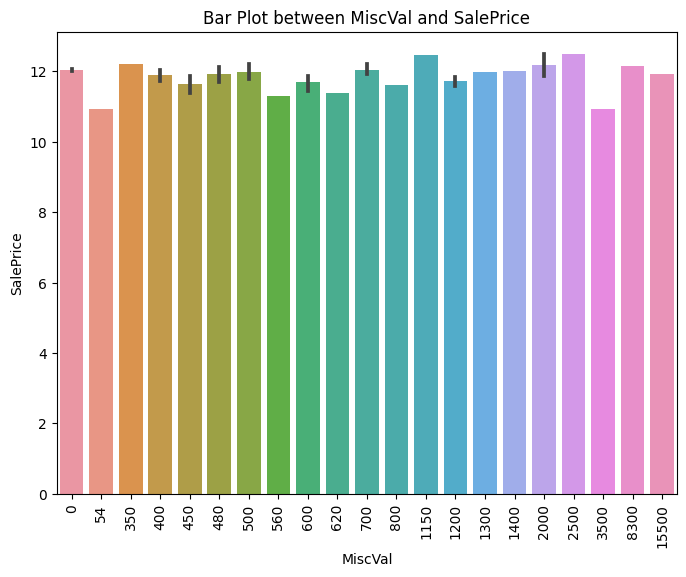

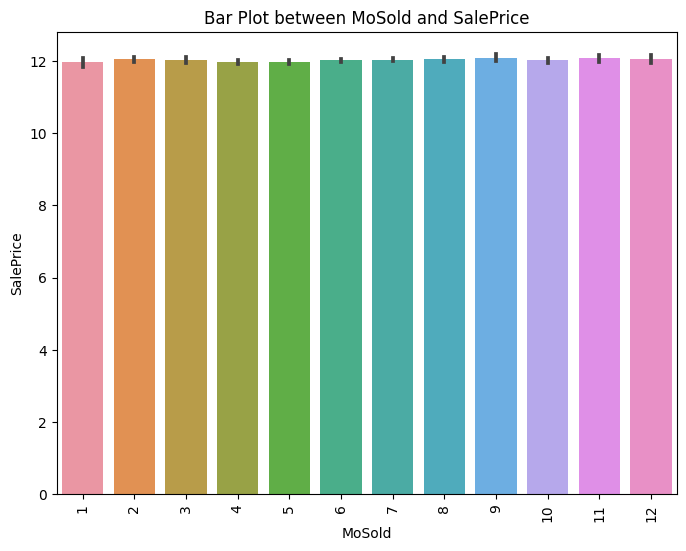

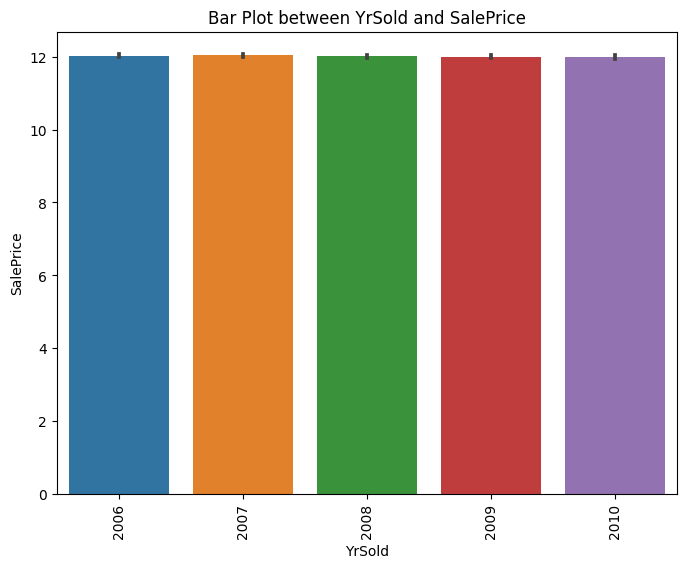

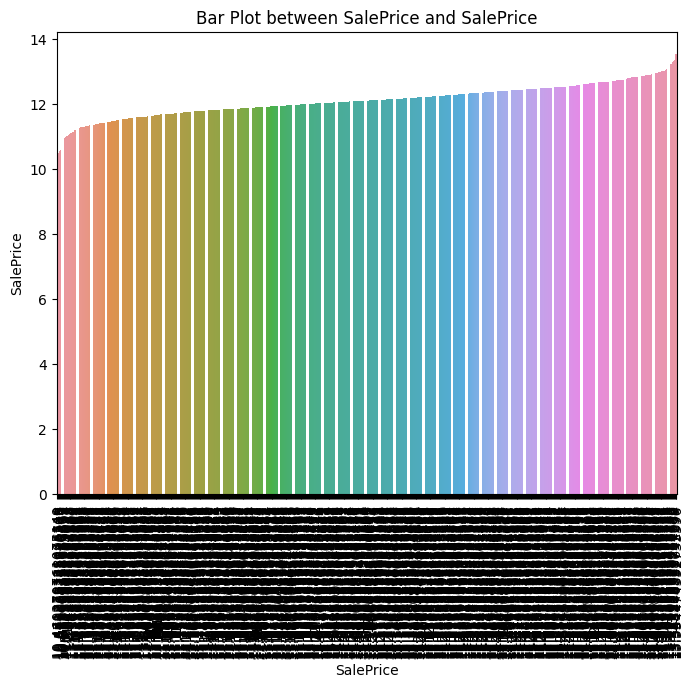

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras entre características categóricas en columnaNum y SalePrice
for feature in columnaNum.columns:

        plt.figure(figsize=(8, 6))
        sns.barplot(x=columnaNum[feature], y=raw_data['SalePrice'])
        plt.xticks(rotation=90)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(f'Bar Plot between {feature} and SalePrice')
        plt.show()

#6. Preparación de Datos y Modelado


In [84]:
# Obtenemos variables dummies
dummie_data = pd.get_dummies(raw_data)


In [85]:
#Normalizamos
def maximum_absolute_scaling(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

dummie_data = maximum_absolute_scaling(dummie_data)

##6.1 Splitting data into Train Test


In [86]:
# Separamos los datos en dos partes: el target (SalePrice) y las variables explicativas
X = dummie_data.drop(['SalePrice'], axis=1)
y = dummie_data['SalePrice']

# Dividimos los datos en dos grupos: uno para entrenar el modelo y otro para validarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ExterQual_TA       -0.60
KitchenQual_TA     -0.54
BsmtQual_TA        -0.48
GarageFinish_Unf   -0.43
MasVnrType_None    -0.40
                    ... 
GarageArea          0.65
GarageCars          0.68
GrLivArea           0.70
OverallQual         0.82
SalePrice           1.00
Name: SalePrice, Length: 271, dtype: float64


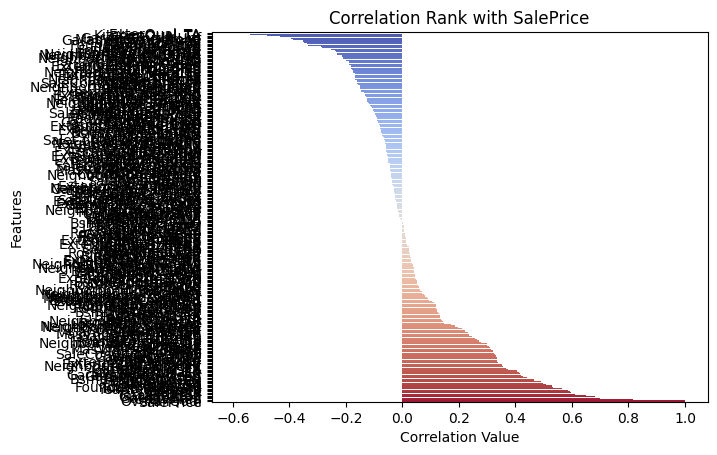

In [88]:
# Calculamos la correlación entre las variables y SalePrice
correlation = dummie_data.corr()['SalePrice'].sort_values()
print(correlation)
custom_palette = sns.color_palette("coolwarm", len(correlation))

# Graficamos el ranking de correlación
sns.barplot(x=correlation.values, y=correlation.index, palette=custom_palette)
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.title('Correlation Rank with SalePrice')
plt.show()

ExterQual_TA        -0.60
KitchenQual_TA      -0.54
BsmtQual_TA         -0.48
GarageFinish_Unf    -0.43
KitchenQual_Gd       0.41
KitchenQual_Ex       0.41
GarageType_Attchd    0.42
GarageFinish_Fin     0.42
MasVnrArea           0.43
BsmtFinType1_GLQ     0.44
BsmtQual_Ex          0.46
HeatingQC_Ex         0.47
Fireplaces           0.49
GarageYrBlt          0.50
ExterQual_Gd         0.51
Foundation_PConc     0.53
TotRmsAbvGrd         0.53
YearRemodAdd         0.57
YearBuilt            0.59
FullBath             0.59
1stFlrSF             0.60
TotalBsmtSF          0.61
GarageArea           0.65
GarageCars           0.68
GrLivArea            0.70
OverallQual          0.82
SalePrice            1.00
Name: SalePrice, dtype: float64


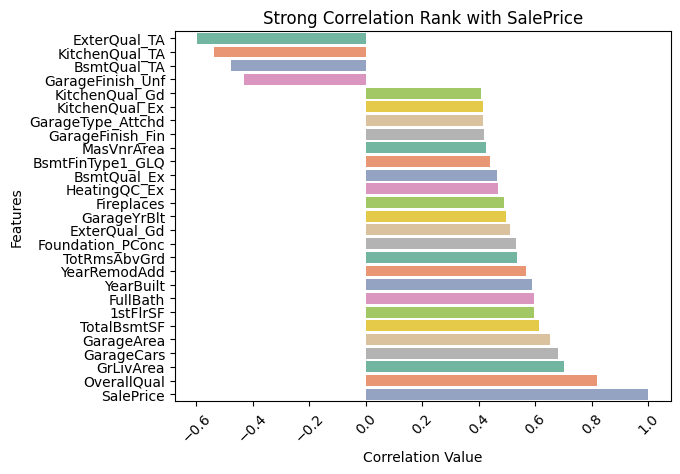

In [96]:
# Seleccion de los atributos con correlacion mayor a 0.4
strong_correlation = correlation[abs(correlation) > 0.4]
print(strong_correlation)

# Define una paleta de colores personalizada (puedes cambiar estos colores)
custom_palette = sns.color_palette("Set2", len(strong_correlation))

# Graficamos las variables seleccionadas con el color personalizado
sns.barplot(x=strong_correlation.values, y=strong_correlation.index, palette=custom_palette)
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.title('Strong Correlation Rank with SalePrice')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.show()

In [91]:
X_correlation = dummie_data[strong_correlation.index.drop('SalePrice')]
X_correlation_train, X_correlation_test, y_correlation_train, y_correlation_test = train_test_split(X_correlation, y, test_size=0.2, random_state=42)

#7. Construcción-del-Modelo

##7.1 Ridge Regression



Mean Squared Error: 8.953952421632124e-05
R2 Score: 0.9121057720593938


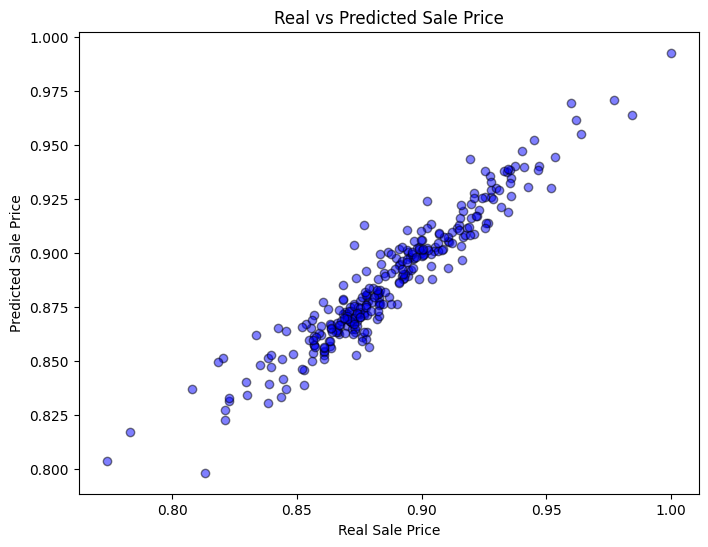

In [98]:
# Rregresión Ridge
reg = Ridge().fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, marker='o', edgecolors='k')
plt.xlabel("Real Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Real vs Predicted Sale Price")

# Metricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

In [99]:
reg.coef_

array([-6.00948674e-03, -2.28726144e-03,  8.77642045e-03,  3.17016457e-02,
        2.05874903e-02,  3.81992947e-03,  6.22879909e-03,  1.31780971e-03,
        9.30078873e-03,  5.20559218e-03,  5.22642393e-03,  1.18454371e-02,
        2.74678064e-02,  1.44383940e-02,  8.53958641e-03,  2.89930653e-02,
        9.44094670e-03,  1.73032005e-03,  9.82112725e-03,  6.52474896e-03,
        1.00752427e-02, -9.19425302e-03,  1.14069382e-02,  7.69193723e-03,
       -3.19832709e-04,  1.25334239e-02,  8.20186569e-03,  6.20858937e-03,
        1.31628760e-03,  2.49325116e-03,  8.17368275e-03,  6.59846923e-03,
       -2.90355333e-03,  4.87247851e-04, -3.85595577e-05, -1.97959998e-04,
       -1.55317318e-02,  5.20417499e-03,  5.78390537e-03,  3.31778421e-03,
        1.22586726e-03,  5.93823689e-04, -5.93823689e-04,  2.32296089e-05,
        3.22627555e-03, -3.25142784e-03,  1.92268256e-06, -3.95076431e-03,
        2.38569148e-03,  9.19722089e-04,  6.45350736e-04,  6.18818819e-03,
       -6.18818819e-03,  

In [101]:
print(np.count_nonzero(reg.coef_ == 0))
print(np.count_nonzero((reg.coef_ >= -0.0001) & (reg.coef_ <= 0.0001)))
reg.alpha

2
7


1.0

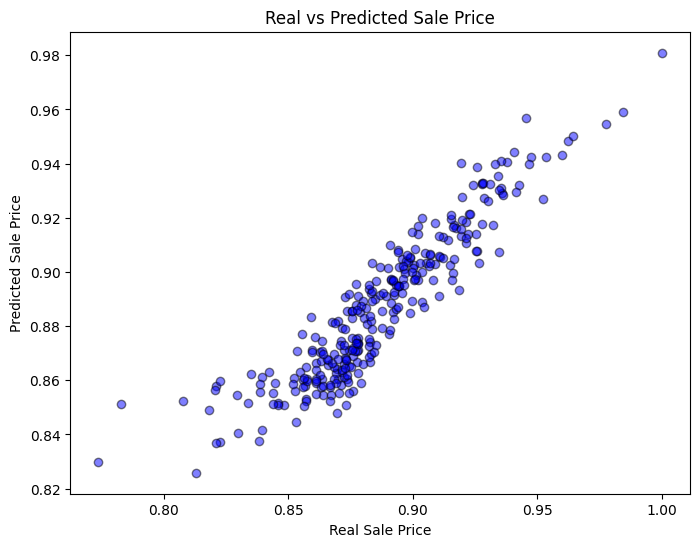

Mean Squared Error: 0.0001577304550249286
R2 Score: 0.8451678553300872


In [104]:
# Aplicamos un modelo de regresión Ridge a los datos
reg = Ridge().fit(X_correlation_train, y_correlation_train)

# Hacemos predicciones con los datos de validación
y_pred = reg.predict(X_correlation_test)

# Graficamos las predicciones junto con los datos reales

plt.figure(figsize=(8, 6))
plt.scatter(y_correlation_test, y_pred, c='blue', alpha=0.5, marker='o', edgecolors='k')
plt.xlabel("Real Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Real vs Predicted Sale Price")
plt.show()

# Calculamos el mean squared error y el r2_score
mse = mean_squared_error(y_correlation_test, y_pred)
r2 = r2_score(y_correlation_test, y_pred)

# Imprimimos los resultados
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

In [105]:
reg.coef_

array([ 0.00310962,  0.00408286, -0.00071715, -0.0022555 ,  0.00867067,
        0.01307817,  0.00495811,  0.000557  , -0.00047893,  0.00439212,
        0.00536437,  0.00317525,  0.01621017, -0.00049942,  0.00320193,
        0.00129441,  0.01883007,  0.01600823,  0.01563942,  0.00369846,
        0.00855831,  0.02282747,  0.01222071,  0.02117465,  0.04756066,
        0.05168002])

In [106]:
print(np.count_nonzero(reg.coef_ == 0))
print(np.count_nonzero((reg.coef_ >= -0.0001) & (reg.coef_ <= 0.0001)))

0
0


In [107]:
#Optimizacion del valor de alpha
X_alpha, X_val, y_alpha, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=63)

In [110]:
def ridge_by_alpha_list(X, y, X_val, y_val, X_test, y_test, alpha_list):
    for alpha in alpha_list:
        reg = Ridge(alpha=alpha).fit(X, y)
        y_pred_val = reg.predict(X_val)
        print(f'Alpha {alpha}')
        print('Mean Squared Error for validation:', mean_squared_error(y_val, y_pred_val))
        print('R2 Score for validation:', r2_score(y_val, y_pred_val))
        y_pred_test = reg.predict(X_test)
        print('Mean Squared Error for testing:', mean_squared_error(y_test, y_pred_test))
        print('R2 Score for testing:', r2_score(y_test, y_pred_test))
        print()

# Lista de valores alpha que deseas probar
alpha_list = [0.25, 0.5, 1, 2]

# Llama a la función con la lista de alpha
ridge_by_alpha_list(X_alpha, y_alpha, X_val, y_val, X_test, y_test, alpha_list)

Alpha 0.25
Mean Squared Error for validation: 0.000178676526641335
R2 Score for validation: 0.7626402127337544
Mean Squared Error for testing: 8.916672702682507e-05
R2 Score for testing: 0.9124717190692309

Alpha 0.5
Mean Squared Error for validation: 0.000155985127249561
R2 Score for validation: 0.792784215606703
Mean Squared Error for testing: 8.98252278392499e-05
R2 Score for testing: 0.9118253182645257

Alpha 1
Mean Squared Error for validation: 0.00013880336312372486
R2 Score for validation: 0.8156090373917926
Mean Squared Error for testing: 9.297584625543753e-05
R2 Score for testing: 0.9087325927262792

Alpha 2
Mean Squared Error for validation: 0.00012971650872432858
R2 Score for validation: 0.8276803142836341
Mean Squared Error for testing: 9.861736163528428e-05
R2 Score for testing: 0.9031947406652303



In [112]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

def find_best_alpha(X, y, X_val, y_val, X_test, y_test, alpha_list, metric='mse'):
    best_alpha = None
    best_metric_value = float('inf') if metric == 'mse' else float('-inf')

    for alpha in alpha_list:
        reg = Ridge(alpha=alpha).fit(X, y)
        y_pred_val = reg.predict(X_val)

        if metric == 'mse':
            metric_value = mean_squared_error(y_val, y_pred_val)
            if metric_value < best_metric_value:
                best_metric_value = metric_value
                best_alpha = alpha
        elif metric == 'r2':
            metric_value = r2_score(y_val, y_pred_val)
            if metric_value > best_metric_value:
                best_metric_value = metric_value
                best_alpha = alpha

        print(f'Alpha {alpha}')
        print(f'{metric.upper()}: {metric_value}')
        print()

    return best_alpha

# Lista de valores alpha que deseas probar
alpha_list = [0.25, 0.5, 1, 2]

# Llama a la función para encontrar el mejor alpha basado en MSE (puedes cambiar a 'r2' para R²)
best_alpha = find_best_alpha(X_alpha, y_alpha, X_val, y_val, X_test, y_test, alpha_list, metric='mse')
print(f'Mejor Alpha en base a MSE: {best_alpha}')


Alpha 0.25
MSE: 0.000178676526641335

Alpha 0.5
MSE: 0.000155985127249561

Alpha 1
MSE: 0.00013880336312372486

Alpha 2
MSE: 0.00012971650872432858

Mejor Alpha en base a MSE: 2


Mean Squared Error: 9.429759602217607e-05
R2 Score: 0.9074351302224859


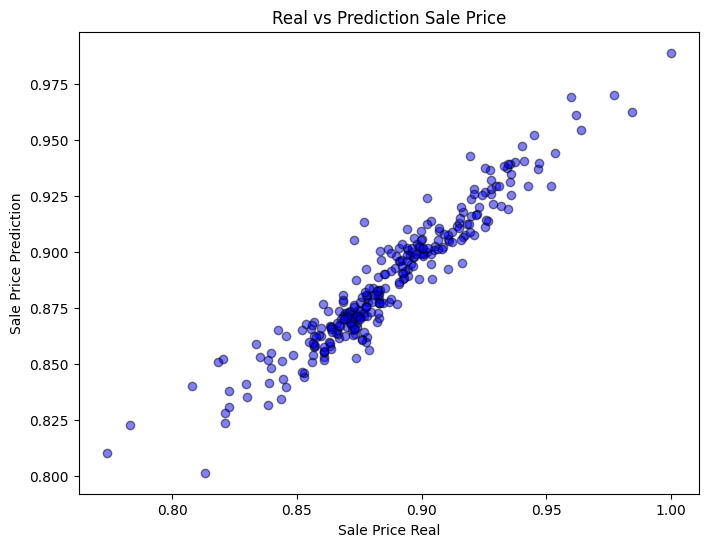

In [115]:
# Aplicamos el mejor alpha a los datos de entrenamiento sin separación con validación y hacemos predicciones con testing
reg = Ridge(alpha=2).fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculo mse y r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, marker='o', edgecolors='k')
plt.xlabel("Sale Price Real")
plt.ylabel("Sale Price Prediction")
plt.title("Real vs Prediction Sale Price")
plt.show()

Text(0.5, 1.0, 'Histograma de Residuales de las Predicciones con Ridge Regression')

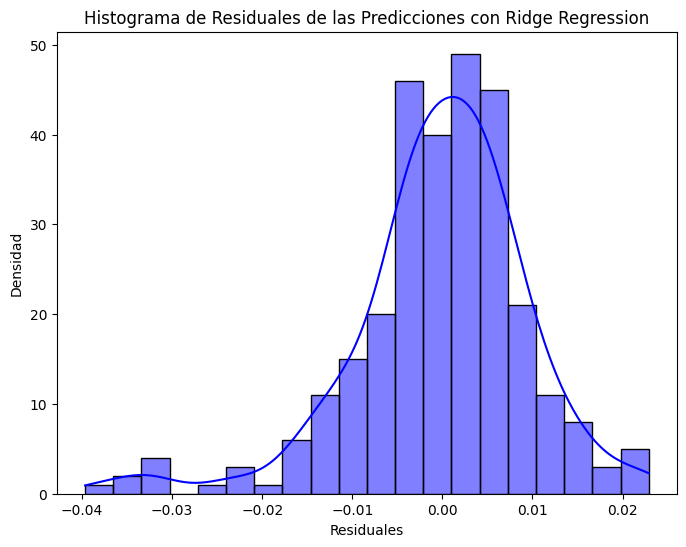

In [118]:
#Residuales
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.xlabel("Residuales")
plt.ylabel("Densidad")
plt.title("Histograma de Residuales de las Predicciones con Ridge Regression")

<Figure size 800x600 with 0 Axes>

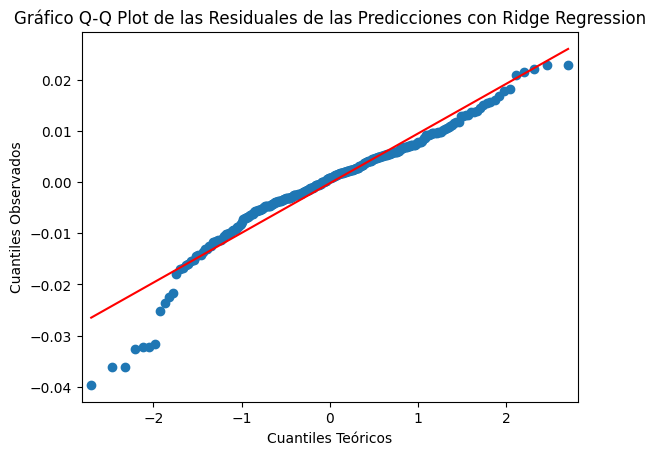

In [120]:
# Crea el gráfico Q-Q Plot personalizado
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s', color='blue')

plt.title("Gráfico Q-Q Plot de las Residuales de las Predicciones con Ridge Regression")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles Observados")

plt.show()

##7.1 Lasso Regression


EnclosedPorch   -0.15
KitchenAbvGr    -0.15
MSSubClass      -0.07
LowQualFinSF    -0.04
YrSold          -0.04
OverallCond     -0.04
MiscVal         -0.02
BsmtHalfBath    -0.01
BsmtFinSF2       0.00
3SsnPorch        0.05
MoSold           0.06
PoolArea         0.07
ScreenPorch      0.12
BedroomAbvGr     0.21
BsmtUnfSF        0.22
BsmtFullBath     0.24
LotArea          0.26
HalfBath         0.31
2ndFlrSF         0.32
OpenPorchSF      0.32
WoodDeckSF       0.33
LotFrontage      0.34
BsmtFinSF1       0.37
MasVnrArea       0.43
Fireplaces       0.49
GarageYrBlt      0.50
TotRmsAbvGrd     0.53
YearRemodAdd     0.57
YearBuilt        0.59
FullBath         0.59
1stFlrSF         0.60
TotalBsmtSF      0.61
GarageArea       0.65
GarageCars       0.68
GrLivArea        0.70
OverallQual      0.82
SalePrice        1.00
Name: SalePrice, dtype: float64


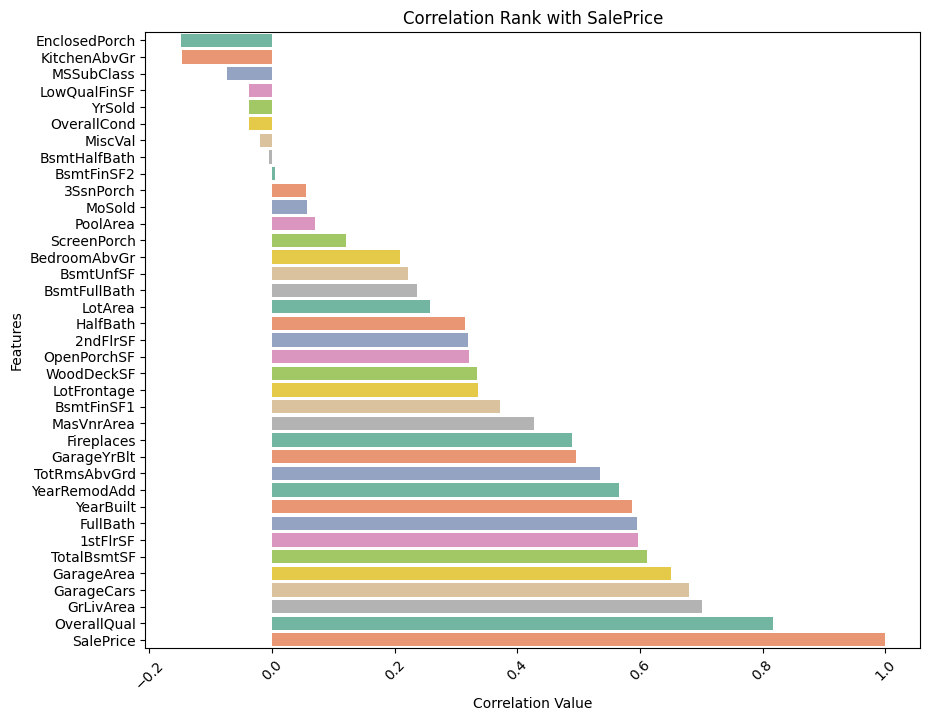

In [123]:
# Calculamos la correlación entre las variables y SalePrice
correlation = raw_data.corr()['SalePrice'].sort_values()

# Mostramos el ranking de correlación
print(correlation)

# Graficamos el ranking de correlación
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index, palette=custom_palette)

plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.title('Correlation Rank with SalePrice')
plt.xticks(rotation=45)
plt.show()

MasVnrArea     0.43
Fireplaces     0.49
GarageYrBlt    0.50
TotRmsAbvGrd   0.53
YearRemodAdd   0.57
YearBuilt      0.59
FullBath       0.59
1stFlrSF       0.60
TotalBsmtSF    0.61
GarageArea     0.65
GarageCars     0.68
GrLivArea      0.70
OverallQual    0.82
SalePrice      1.00
Name: SalePrice, dtype: float64


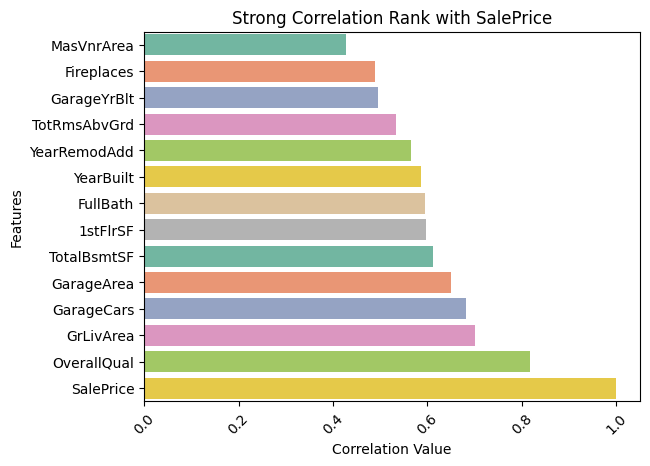

In [124]:
# Seleccion de los atributos con correlacion mayor a 0.4
strong_correlation = correlation[abs(correlation) > 0.4]
print(strong_correlation)

# Define una paleta de colores personalizada (puedes cambiar estos colores)
custom_palette = sns.color_palette("Set2", len(strong_correlation))

# Graficamos las variables seleccionadas con el color personalizado
sns.barplot(x=strong_correlation.values, y=strong_correlation.index, palette=custom_palette)
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.title('Strong Correlation Rank with SalePrice')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Mean Squared Error: 0.03906934310063477
R2 Score: 0.7906374999884052


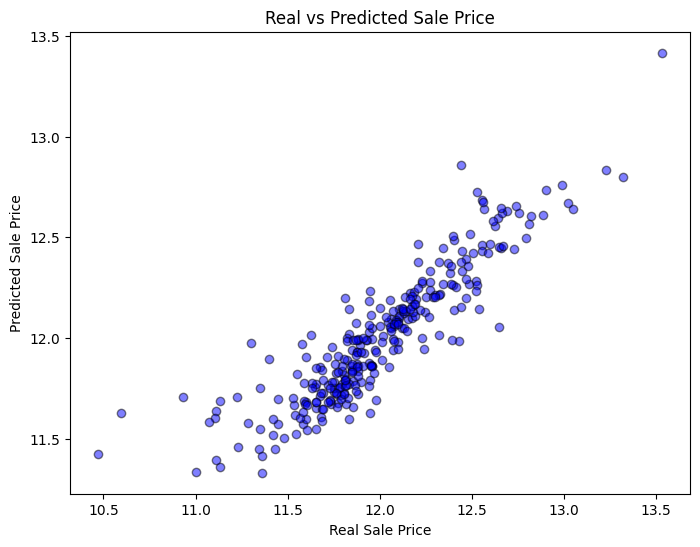

In [126]:
# Split
X = raw_data.drop(['SalePrice'], axis=1)
y = raw_data['SalePrice']

# Dividi para entrenar el modelo y para validar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X = raw_data[strong_correlation.index.drop('SalePrice')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresion Lasso
reg = Lasso().fit(X_train, y_train)

# Predicciones
y_pred = reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, marker='o', edgecolors='k')
plt.xlabel("Real Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Real vs Predicted Sale Price")

# Calculo de mse y r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

In [128]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametros
param_grid = {'alpha': np.logspace(-3, 3, 100)}

# Creamos un modelo Lasso
lasso = Lasso()

# Aplicacio de GridSearchCV
grid = GridSearchCV(lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Mejor alpha
best_alpha = grid.best_params_['alpha']
print("Mejor alpha: ", best_alpha)

# Modelo Lasso con el mejor alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Metricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mejor alpha:  0.003511191734215131
Mean Squared Error: 0.027713231517363428
R2 Score: 0.8514919634320377


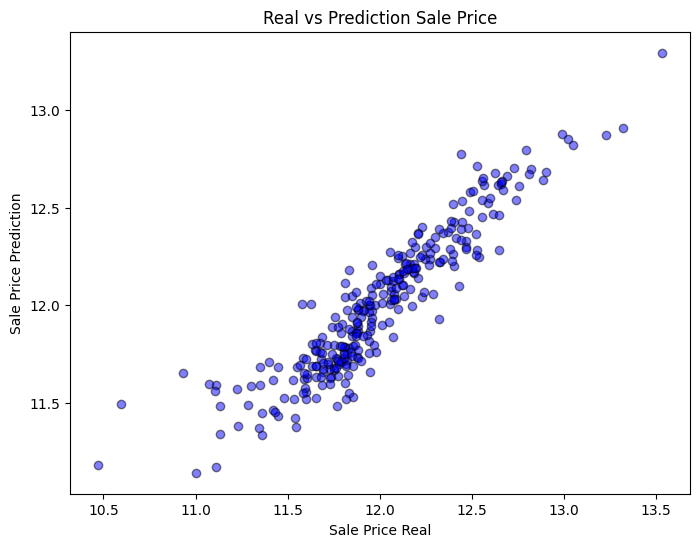

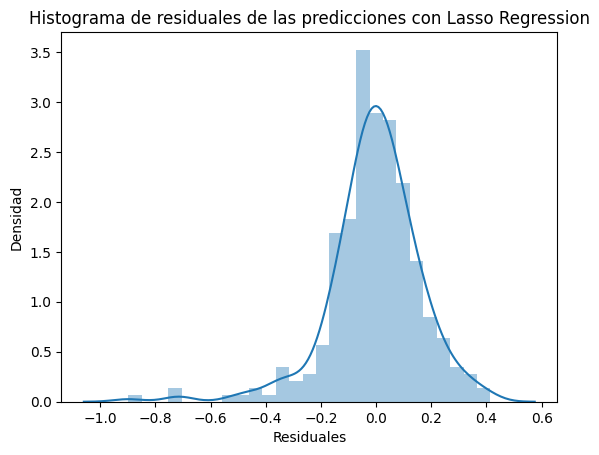

In [137]:
residuals = y_test - y_pred
sns.distplot(residuals)
plt.xlabel("Residuales")
plt.ylabel("Densidad")
plt.title("Histograma de residuales de las predicciones con Lasso Regression")
plt.show()


<Figure size 800x600 with 0 Axes>

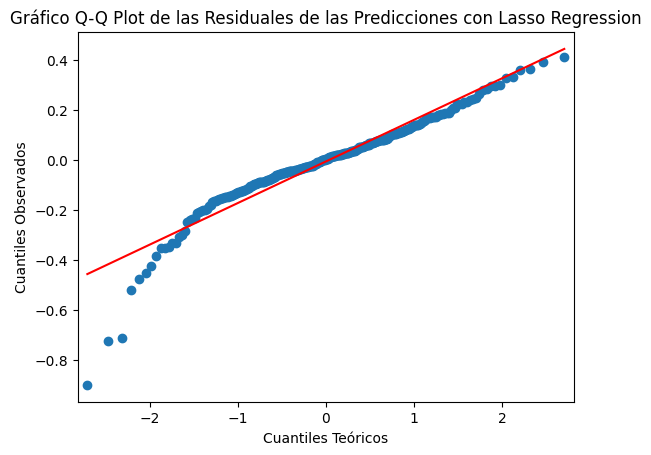

In [141]:
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s', color='blue')
plt.title("Gráfico Q-Q Plot de las Residuales de las Predicciones con Lasso Regression")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles Observados")
plt.show()

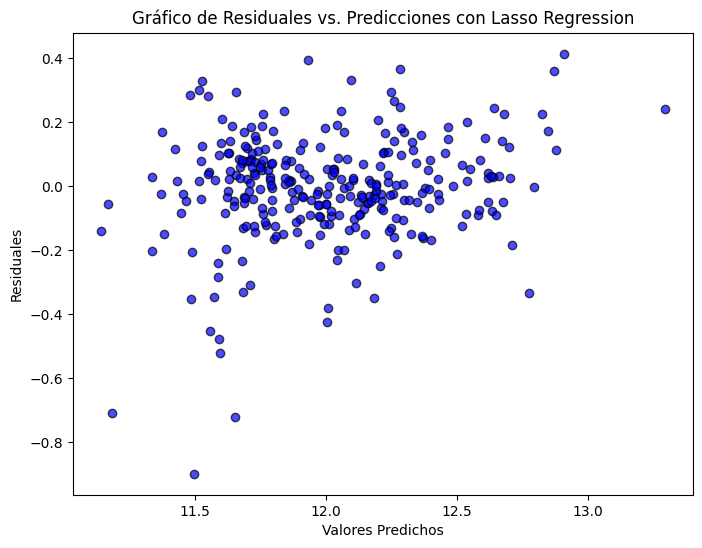

In [144]:
#Residuales y predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7, marker='o', edgecolors='k')

plt.xlabel("Valores Predichos")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales vs. Predicciones con Lasso Regression")
plt.show()

In [157]:
#Elastic Net
#from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos de ejemplo con más variables independientes
X = raw_data.drop(['SalePrice'], axis=1)
y = raw_data['SalePrice']

# Dividi para entrenar el modelo y para validar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X = raw_data[strong_correlation.index.drop('SalePrice')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Entrenar el modelo con los datos de entrenamiento
elastic_net.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = elastic_net.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {elastic_net.coef_}")
print(f"MSE: {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Coeficientes: [4.36232163e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.29826256e-03 2.82765466e-03 0.00000000e+00 1.69127831e-06
 1.50071223e-04 3.73634476e-04 0.00000000e+00 3.22607704e-04
 0.00000000e+00]
MSE: 0.036652135129826985
Coeficiente de Determinación (R²): 0.803590692022188


#8. Conclusiones y Observaciones

* De acuerdo con la correlacion de variables se puede identificar la variables mas influyentes son: MasVnrArea con 0.43, Fireplaces con 0.49, GarageYrBlt con 0.50, TotRmsAbvGrd con 0.53, YearRemodAdd con 0.57, YearBuilt con 0.59, FullBath con 0.59, 1stFlrSF con 0.60, TotalBsmtSF con 0.61, GarageArea con 0.65, GarageCars con 0.68, GrLivArea con 0.70 y OverallQual con 0.82
* Con la regression Ridge se obtuvieron coeficiente de determinacion de: 90.74%. Esto indica que el modelo Ridge explica aproximadamente el 90.74% de la variabilidad en los datos de ventas (SalePrice).
* Con la regresio Lasso se obtuvo un coeficiente de determinacion de: 85.14%. Este valor indica que el modelo Lasso explica alrededor del 85.14% de la variabilidad en los precios de venta.
* Finalmente para comprobacion con elasticnet se obtuvo un coeficien re determinacion de: 80,35%. Este valor indica que el modelo ElasticNet es capaz de explicar aproximadamente el 80.35% de la variabilidad en los precios de venta. Esto sugiere que ElasticNet podría estar encontrando un equilibrio entre la regularización L1 (Lasso) y L2 (Ridge), lo que puede no ser tan efectivo como las estrategias puras de Ridge y Lasso en este conjunto de datos específico.
